In [1]:
import pandas as pd
import sys

sys.path.append("../../utils")
import visualization as visualization
import generic as generic
import project_utils as project_utils
import numpy as np
import matplotlib.pyplot as plt
import importlib


### Load Data

In [2]:
dengue_data = pd.read_csv("../../data/processed/dengue_data.csv")
daily_ovitraps = pd.read_csv(
    "../../data/processed/daily_ovitraps.csv",
    index_col=0,
    parse_dates=True,
)

ovitraps_data = pd.read_csv("../../data/processed/ovitraps_data.csv")


### Process Data

In [3]:
# Dengue data
daily_dengue_data = project_utils.get_daily_dengue(dengue_data)

# ovitraps data
daily_ovitraps_sum = daily_ovitraps.sum(axis=1)
daily_ovitraps_mean = daily_ovitraps.mean(axis=1)

In [6]:
# Get the days for each epidemy year  put them in flat list
day_anoepid_dengue = project_utils.get_epidemic_years_date_ranges_dengue(
    dengue_data
)
epidemy_years_days_dengue = {
    year: days
    for year, days in day_anoepid_dengue.items()
    if year in project_utils.EPIDEMY_YEARS
}
epidemy_date_range_dengue = [
    pd.date_range(
        start=epidemy_years_days_dengue[year][0],
        end=epidemy_years_days_dengue[year][-1],
    )
    for year in project_utils.EPIDEMY_YEARS
]
epidemy_days_flat_dengue = [
    day for period in epidemy_date_range_dengue for day in period
]


In [7]:
# Add anoepid to daily_dengue
daily_dengue_data_with_anoepid = daily_dengue_data.copy()
daily_dengue_data_with_anoepid = pd.DataFrame(
    daily_dengue_data_with_anoepid,
    index=daily_dengue_data_with_anoepid.index,
)
daily_dengue_data_with_anoepid.rename(columns={0: "cases"}, inplace=True)

aux_list = []
for day in daily_dengue_data_with_anoepid.index:
    for key, value in day_anoepid_dengue.items():
        if day in value:
            aux_list.append(key)
daily_dengue_data_with_anoepid["anoepid"] = aux_list

ValueError: Length of values (6657) does not match length of index (6662)

### Plot data

#### Dengue

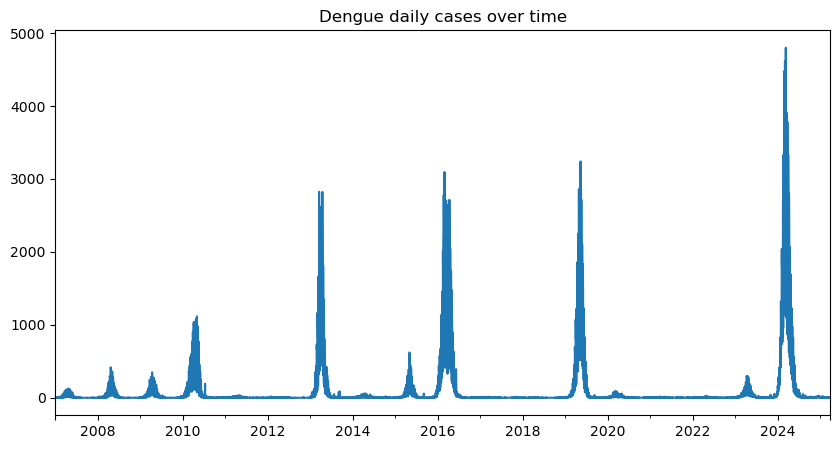

In [8]:
daily_dengue_data.plot(
    kind="line", figsize=(10, 5), title="Dengue daily cases over time"
)
plt.show()


#### Ovitraps

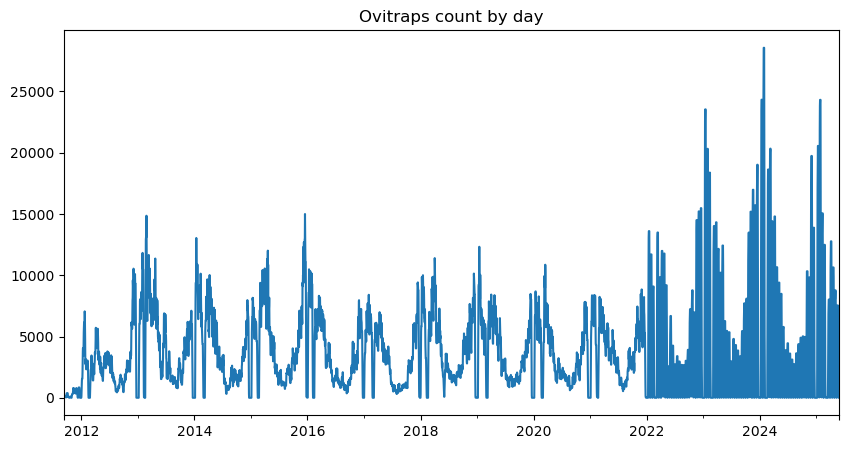

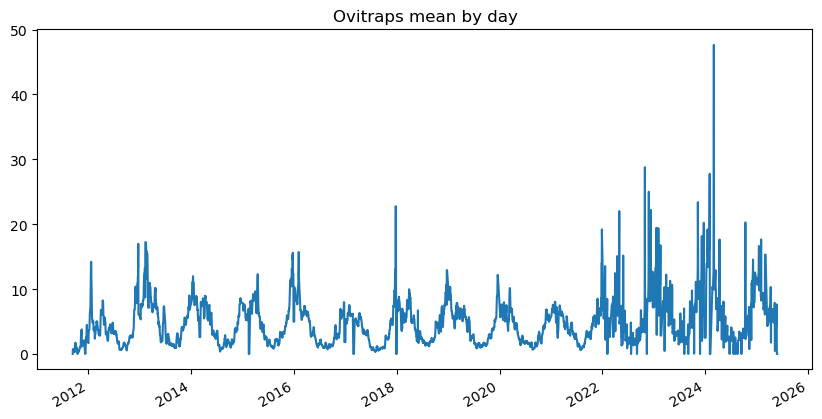

In [9]:
daily_ovitraps_sum.plot(
    kind="line", figsize=(10, 5), title="Ovitraps count by day"
)
plt.show()
daily_ovitraps_mean.dropna().plot(
    kind="line", figsize=(10, 5), title="Ovitraps mean by day"
)
plt.show()

# Correlation Analysis

### All years

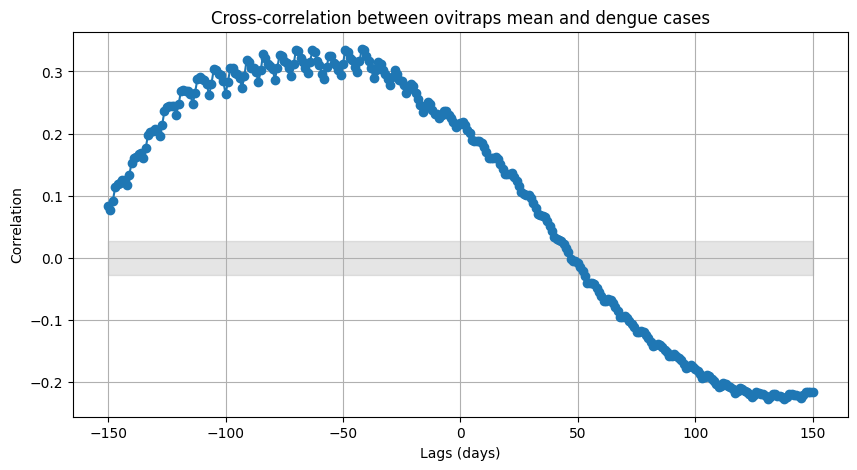

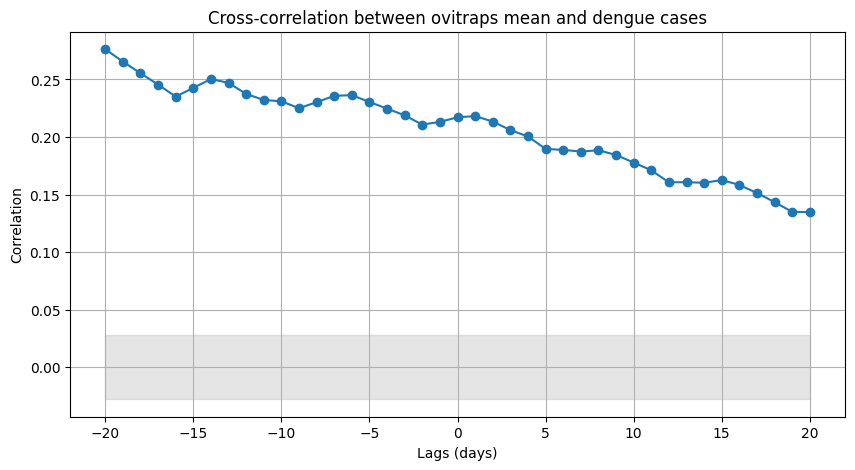

In [ ]:
generic.plot_cross_correlation(
    series_1=daily_ovitraps_mean,
    series_2=daily_dengue_data,
    max_lag=150,
    title="Cross-correlation between ovitraps mean and dengue cases",
    x_label="Lags (days)",
)

generic.plot_cross_correlation(
    series_1=daily_ovitraps_mean,
    series_2=daily_dengue_data,
    max_lag=20,
    title="Cross-correlation between ovitraps mean and dengue cases",
    x_label="Lags (days)",
)

### Epidemic years


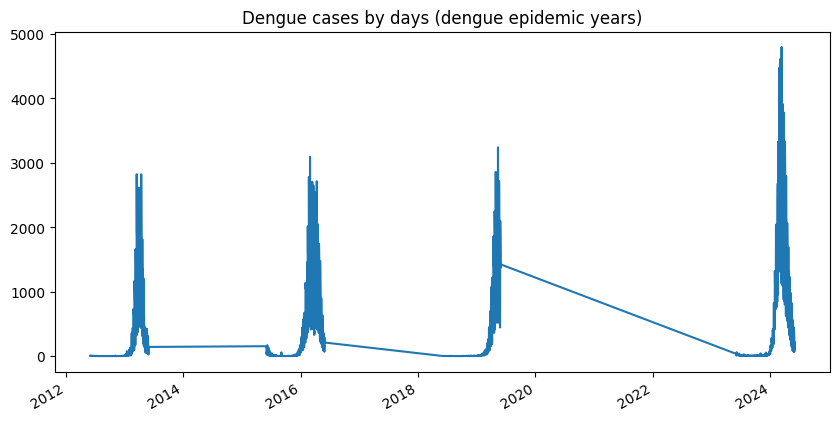

In [ ]:
epidemic_mask_dengue = daily_dengue_data.index.map(
    lambda x: x in epidemy_days_flat_dengue
)
daily_dengue_data_epidemic = daily_dengue_data[epidemic_mask_dengue]
daily_dengue_data_epidemic.plot(
    kind="line",
    figsize=(10, 5),
    title="Dengue cases by days (dengue epidemic years)",
)
daily_dengue_data_epidemic.index = daily_dengue_data_epidemic.index.map(
    lambda x: pd.to_datetime(x, format="%Y-%m-%d")
)


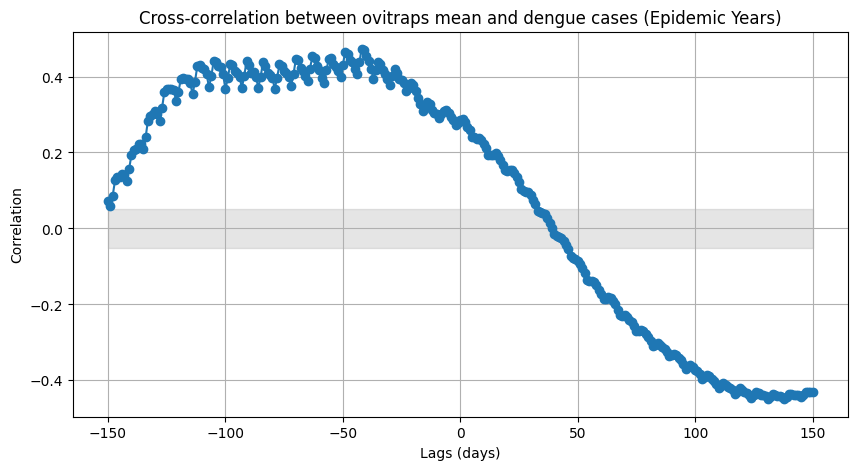

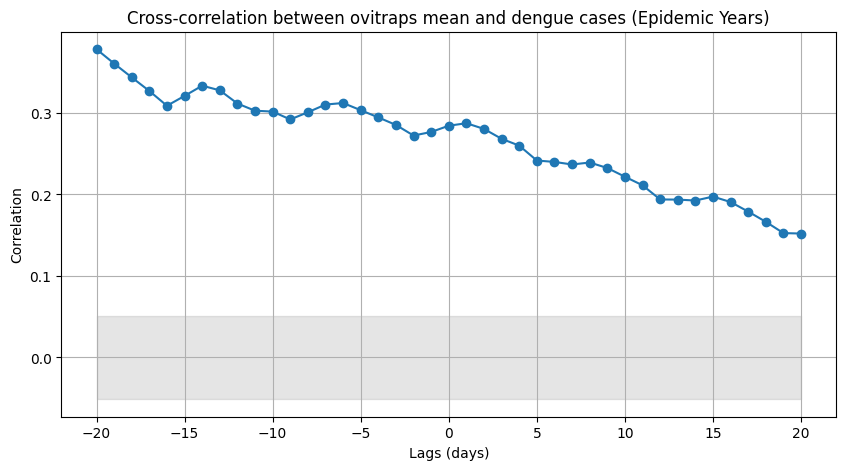

In [ ]:
generic.plot_cross_correlation(
    series_1=daily_ovitraps_mean,
    series_2=daily_dengue_data_epidemic,
    max_lag=150,
    title="Cross-correlation between ovitraps mean and dengue cases (Epidemic Years)",
    x_label="Lags (days)",
)

generic.plot_cross_correlation(
    series_1=daily_ovitraps_mean,
    series_2=daily_dengue_data_epidemic,
    max_lag=20,
    title="Cross-correlation between ovitraps mean and dengue cases (Epidemic Years)",
    x_label="Lags (days)",
)

### Non epidemic years

<Axes: title={'center': 'Dengue cases by days (non-epidemy years - dengue)'}>

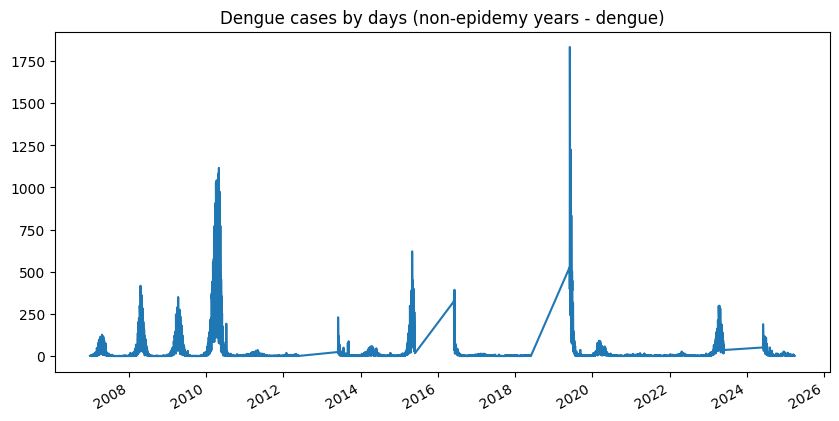

In [ ]:
daily_dengue_data_non_epidemic = daily_dengue_data[~epidemic_mask_dengue]
daily_dengue_data_non_epidemic.index = (
    daily_dengue_data_non_epidemic.index.map(
        lambda x: pd.to_datetime(x, format="%Y-%m-%d")
    )
)
daily_dengue_data_non_epidemic.plot(
    kind="line",
    figsize=(10, 5),
    title="Dengue cases by days (non-epidemy years - dengue)",
)


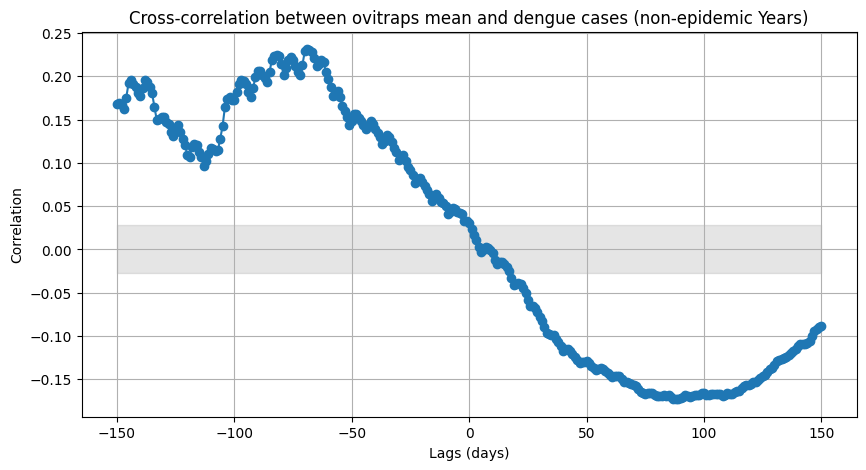

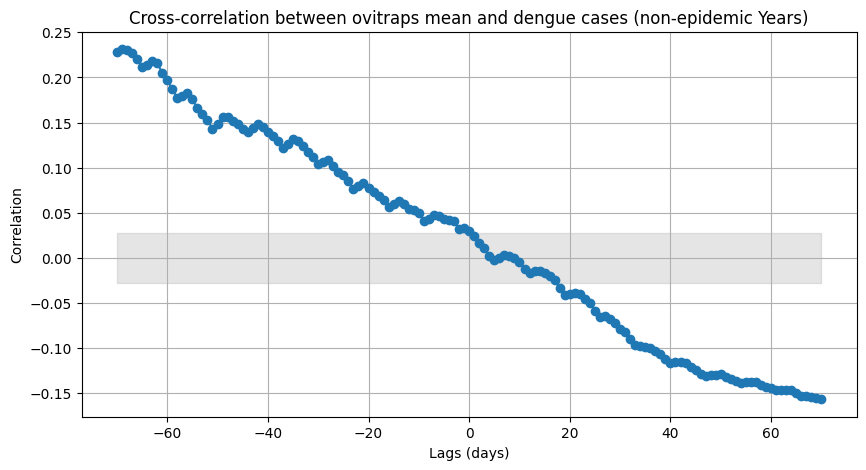

In [ ]:
# Filter non epidemic years
generic.plot_cross_correlation(
    series_1=daily_ovitraps_mean,
    series_2=daily_dengue_data_non_epidemic,
    max_lag=150,
    title="Cross-correlation between ovitraps mean and dengue cases (non-epidemic Years)",
    x_label="Lags (days)",
)

generic.plot_cross_correlation(
    series_1=daily_ovitraps_mean,
    series_2=daily_dengue_data_non_epidemic,
    max_lag=70,
    title="Cross-correlation between ovitraps mean and dengue cases (non-epidemic Years)",
    x_label="Lags (days)",
)

### Correlation by year

Skipping year 2006_07 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2007_08 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2008_09 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2009_10 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2010_11 due to error: Both series must have at least one valid value to calculate correlation.


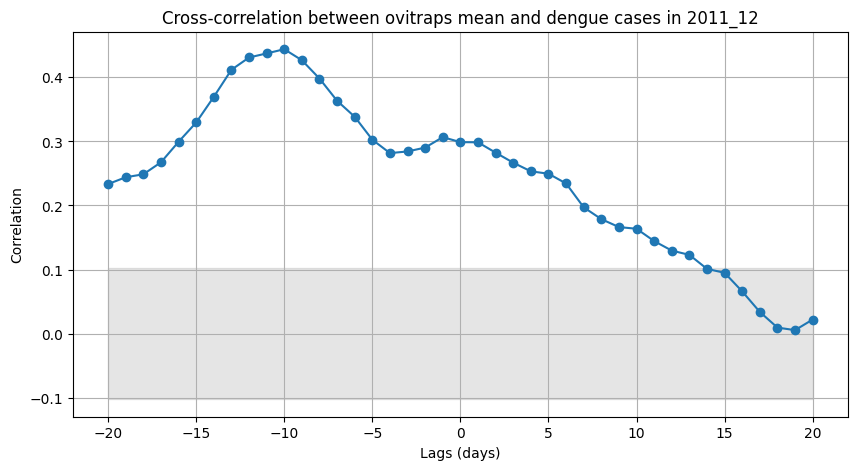

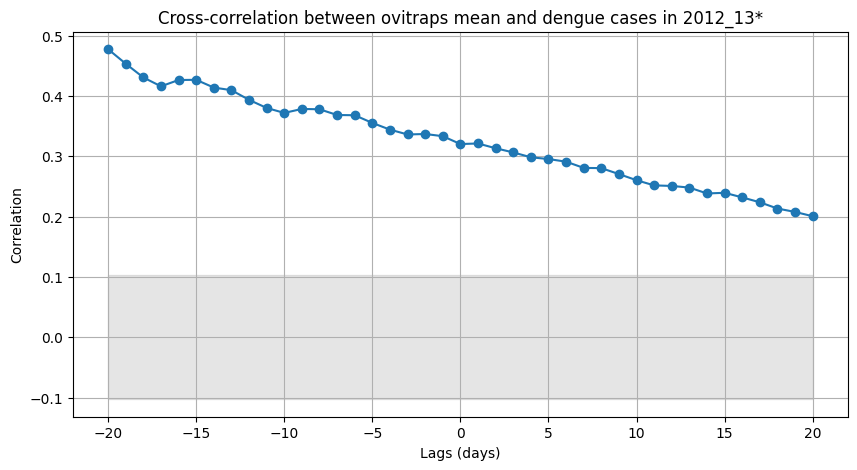

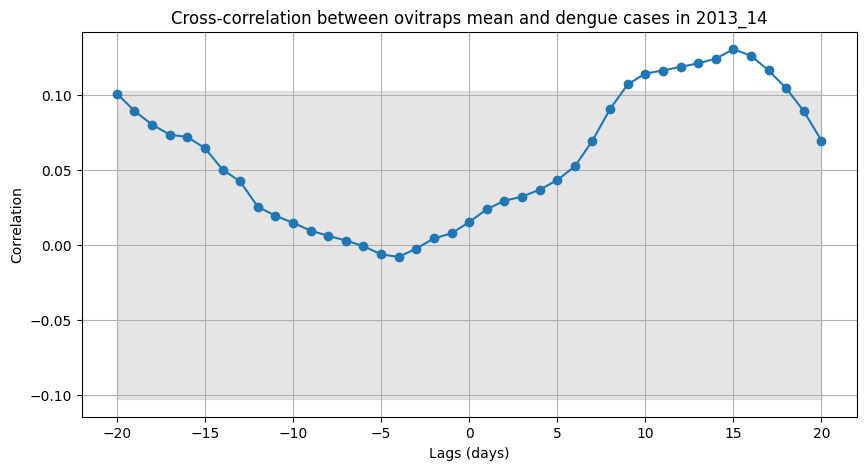

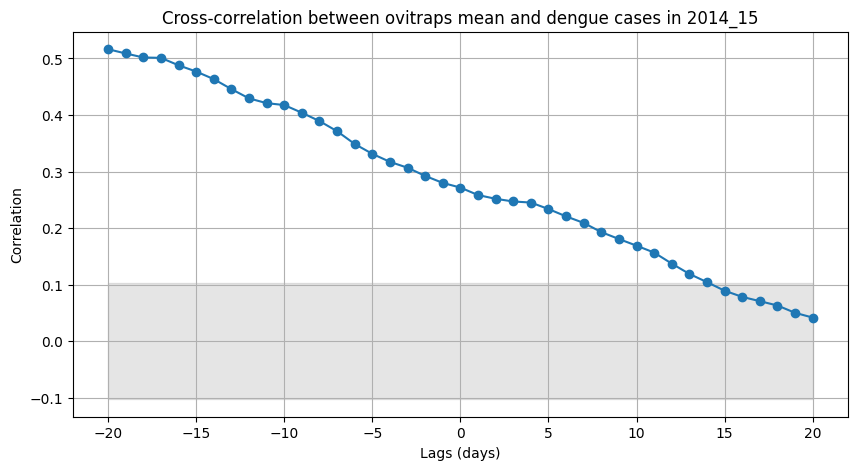

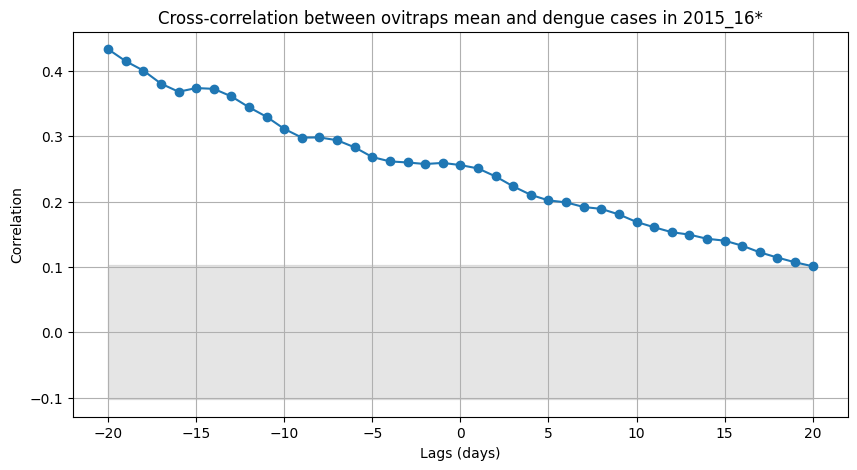

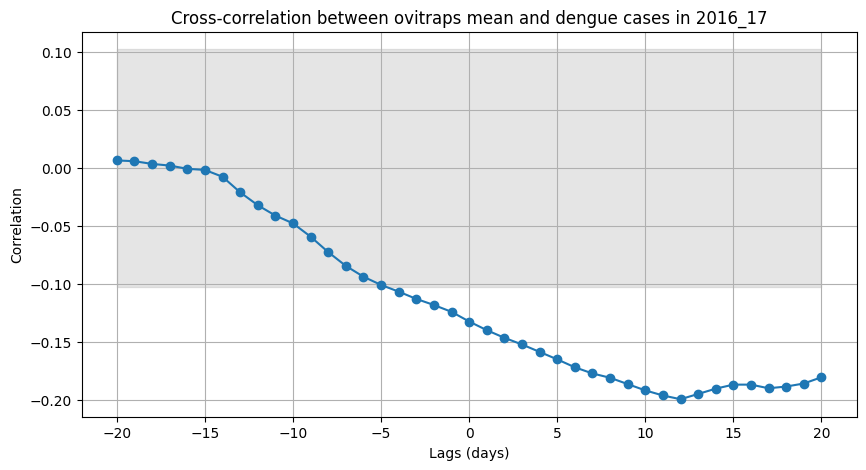

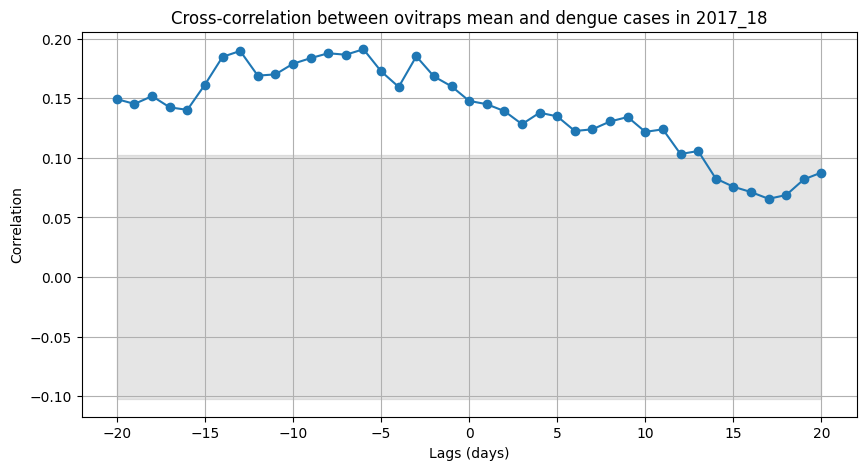

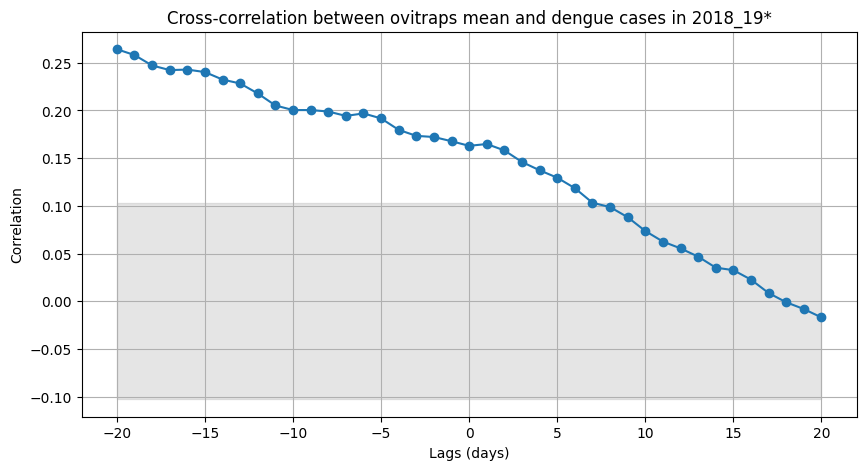

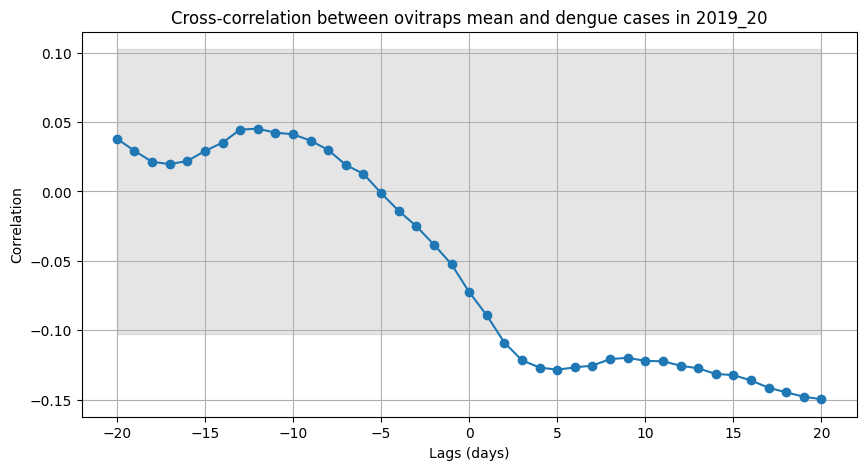

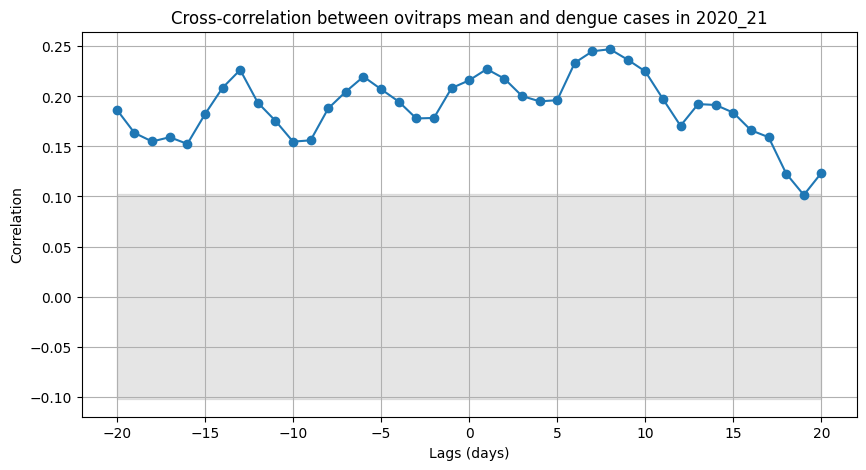

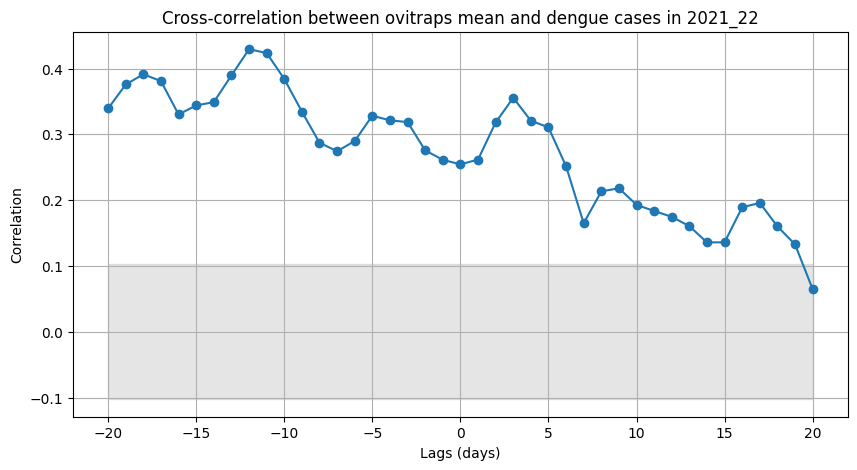

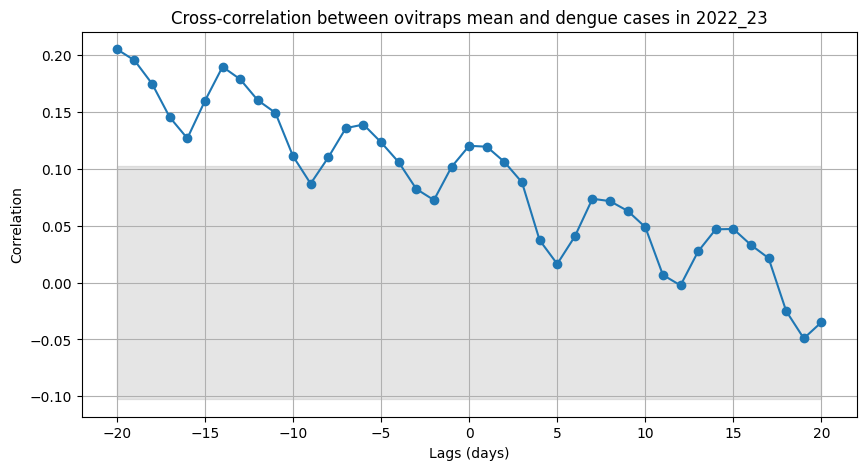

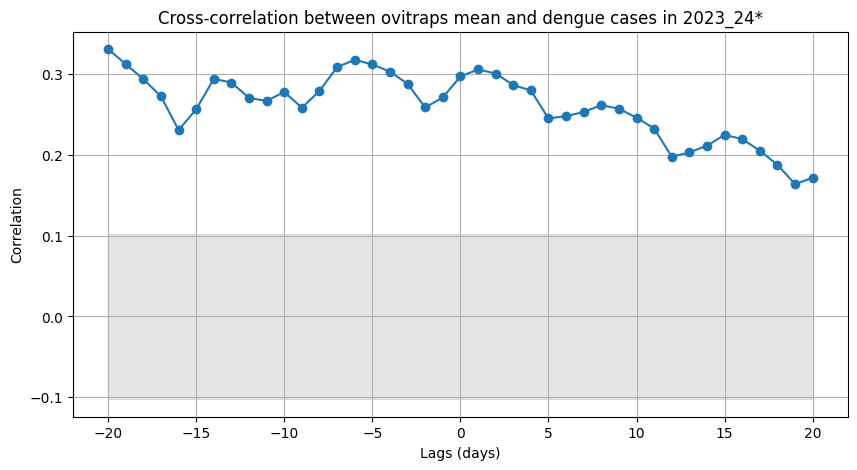

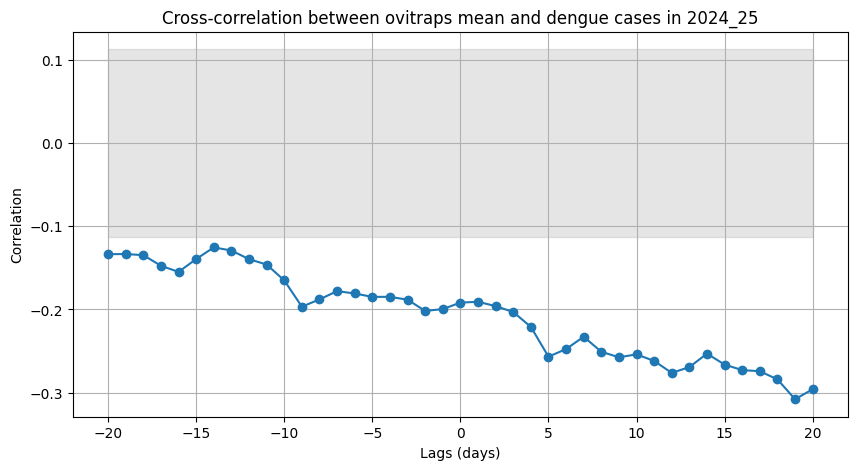

In [ ]:
all_years = dengue_data.anoepid.unique()
all_years.sort()
max_correlation_dict = {}
for year in all_years:
    year_data = daily_dengue_data[
        daily_dengue_data_with_anoepid["anoepid"] == year
    ]
    try:
        if year in project_utils.EPIDEMY_YEARS:
            marker = "*"
        else:
            marker = ""
        # Plot cross-correlation for each year
        generic.plot_cross_correlation(
            series_1=daily_ovitraps_mean,
            series_2=year_data,
            max_lag=20,
            title=f"Cross-correlation between ovitraps mean and dengue cases in {year}{marker}",
            x_label="Lags (days)",
        )
        plt.show()

        # Get the maximum correlation for each year
        max_correlation_dict[year] = generic.max_correlation(
            series_1=daily_ovitraps_mean,
            series_2=year_data,
            max_lag=50,
        )
    except ValueError as e:
        print(f"Skipping year {year} due to error: {e}")
        continue

## Maximum correlation

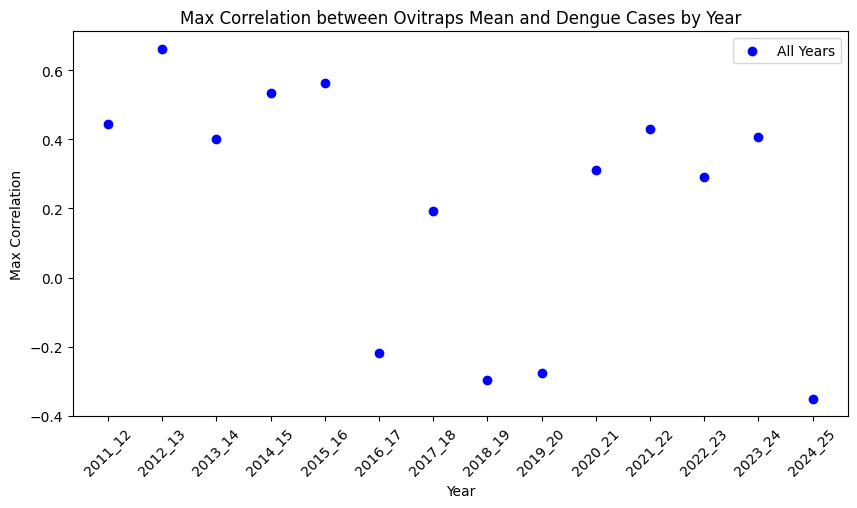

In [ ]:
# Plot max correlations for all years
plt.figure(figsize=(10, 5))
plt.scatter(
    max_correlation_dict.keys(),
    [v[1] for v in max_correlation_dict.values()],
    color="blue",
    label="All Years",
)
plt.ylabel("Max Correlation")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend()
plt.title("Max Correlation between Ovitraps Mean and Dengue Cases by Year")
plt.show()


# Scatter Plots

### All years

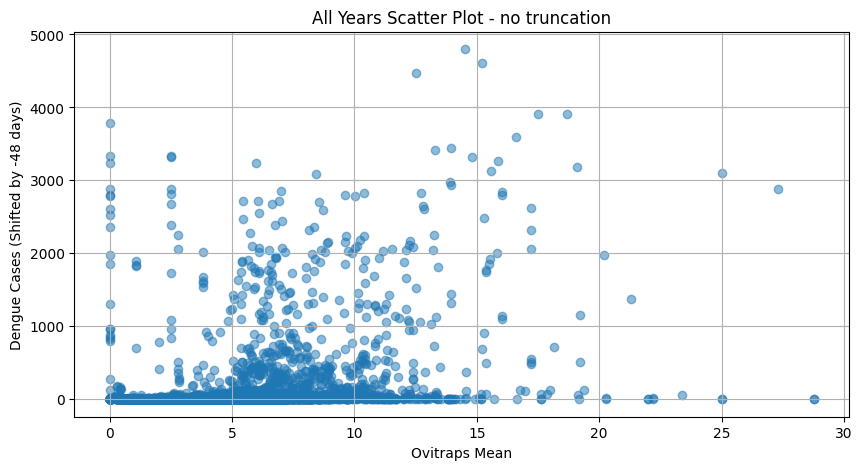

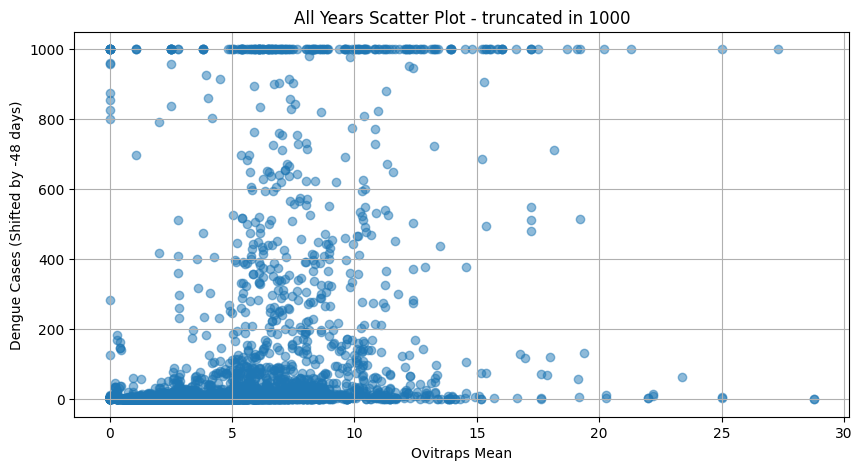

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


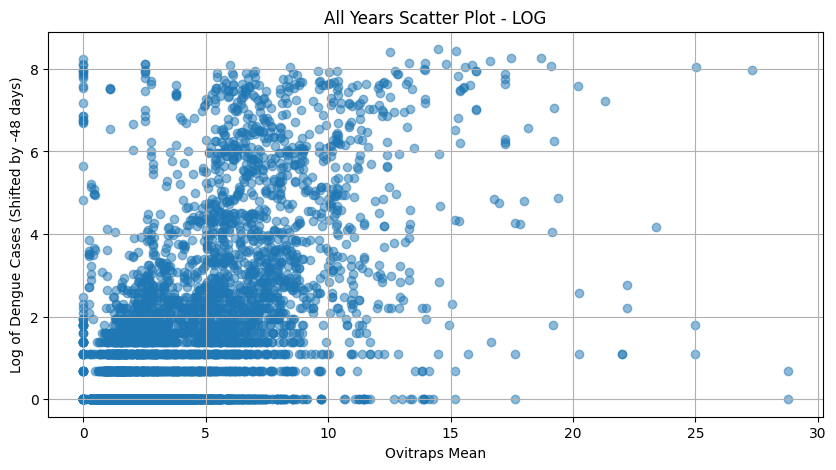

In [ ]:
shift = -48

generic.two_series_scatter_plot(
    daily_ovitraps_mean,
    daily_dengue_data,
    series_2_shift=shift,
    title="All Years Scatter Plot - no truncation",
    xlabel="Ovitraps Mean",
    ylabel=f"Dengue Cases (Shifted by {shift} days)",
)

generic.two_series_scatter_plot(
    daily_ovitraps_mean,
    daily_dengue_data.clip(upper=1000),
    series_2_shift=shift,
    title="All Years Scatter Plot - truncated in 1000",
    xlabel="Ovitraps Mean",
    ylabel=f"Dengue Cases (Shifted by {shift} days)",
)

generic.two_series_scatter_plot(
    daily_ovitraps_mean,
    np.log(daily_dengue_data).replace(-np.inf, 0),
    series_2_shift=shift,
    title="All Years Scatter Plot - LOG",
    xlabel="Ovitraps Mean",
    ylabel=f"Log of Dengue Cases (Shifted by {shift} days)",
)

### Epidemic years

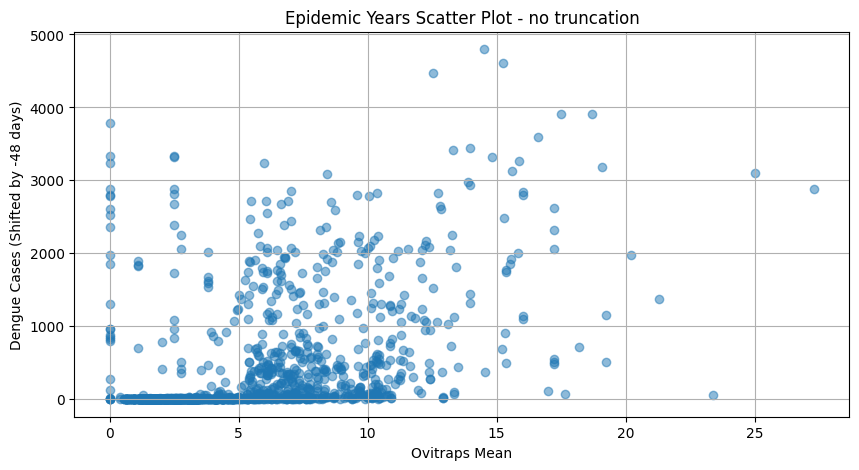

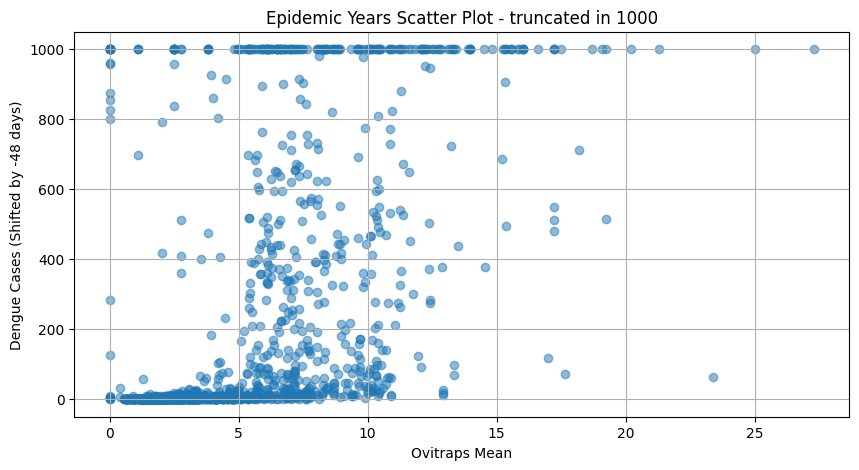

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


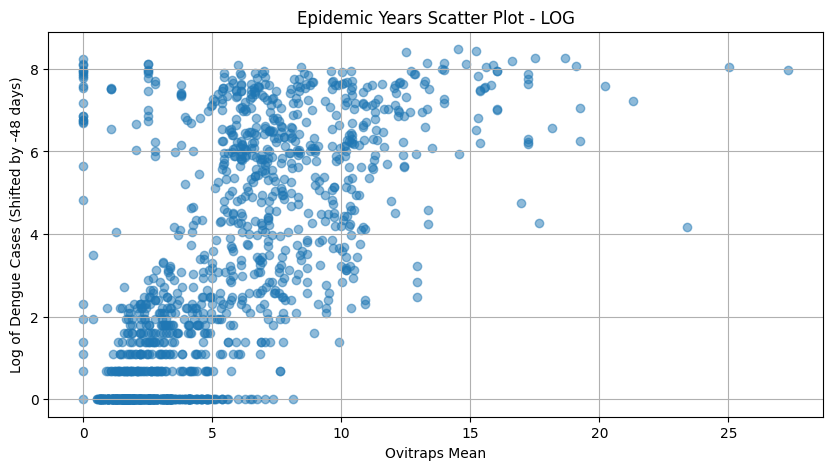

In [ ]:
shift = -48

generic.two_series_scatter_plot(
    daily_ovitraps_mean,
    daily_dengue_data_epidemic,
    series_2_shift=shift,
    title="Epidemic Years Scatter Plot - no truncation",
    xlabel="Ovitraps Mean",
    ylabel=f"Dengue Cases (Shifted by {shift} days)",
)

generic.two_series_scatter_plot(
    daily_ovitraps_mean,
    daily_dengue_data_epidemic.clip(upper=1000),
    series_2_shift=shift,
    title="Epidemic Years Scatter Plot - truncated in 1000",
    xlabel="Ovitraps Mean",
    ylabel=f"Dengue Cases (Shifted by {shift} days)",
)

generic.two_series_scatter_plot(
    daily_ovitraps_mean,
    np.log(daily_dengue_data_epidemic).replace(-np.inf, 0),
    series_2_shift=shift,
    title="Epidemic Years Scatter Plot - LOG",
    xlabel="Ovitraps Mean",
    ylabel=f"Log of Dengue Cases (Shifted by {shift} days)",
)

### Non epidemic years

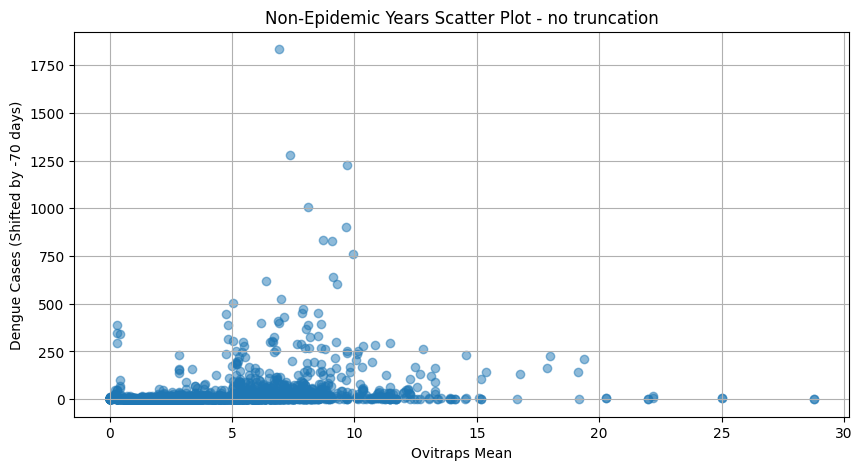

In [ ]:
shift = -70

generic.two_series_scatter_plot(
    daily_ovitraps_mean,
    daily_dengue_data_non_epidemic,
    series_2_shift=shift,
    title="Non-Epidemic Years Scatter Plot - no truncation",
    xlabel="Ovitraps Mean",
    ylabel=f"Dengue Cases (Shifted by {shift} days)",
)


### Year by year

Skipping year 2006_07 due to error: Both series must have at least one valid value to plot.
Skipping year 2007_08 due to error: Both series must have at least one valid value to plot.
Skipping year 2008_09 due to error: Both series must have at least one valid value to plot.
Skipping year 2009_10 due to error: Both series must have at least one valid value to plot.
Skipping year 2010_11 due to error: Both series must have at least one valid value to plot.


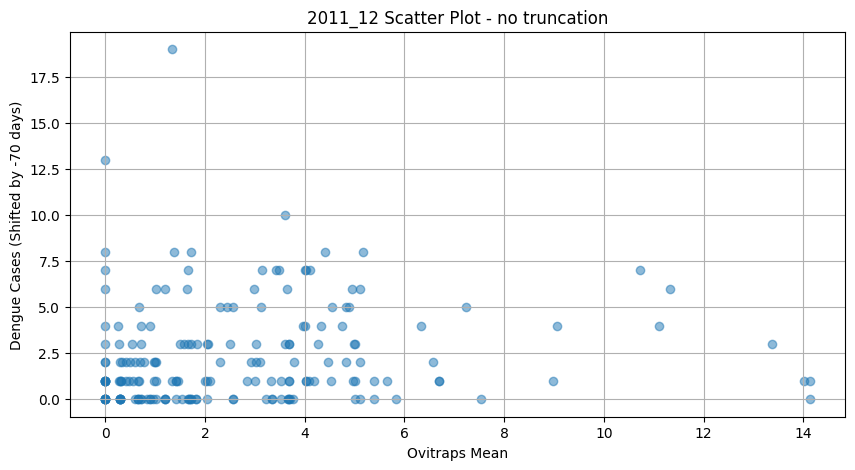

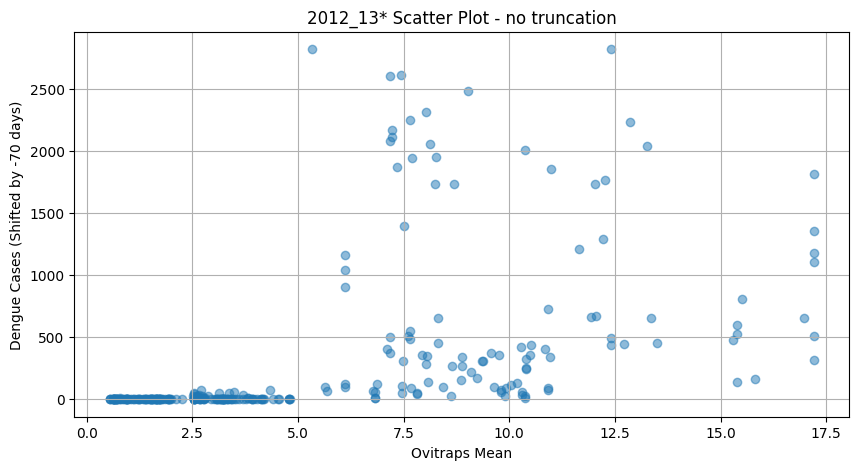

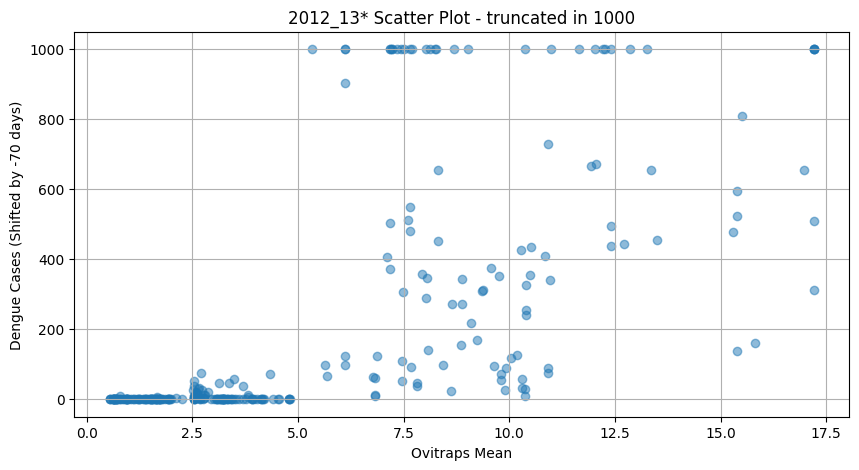

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


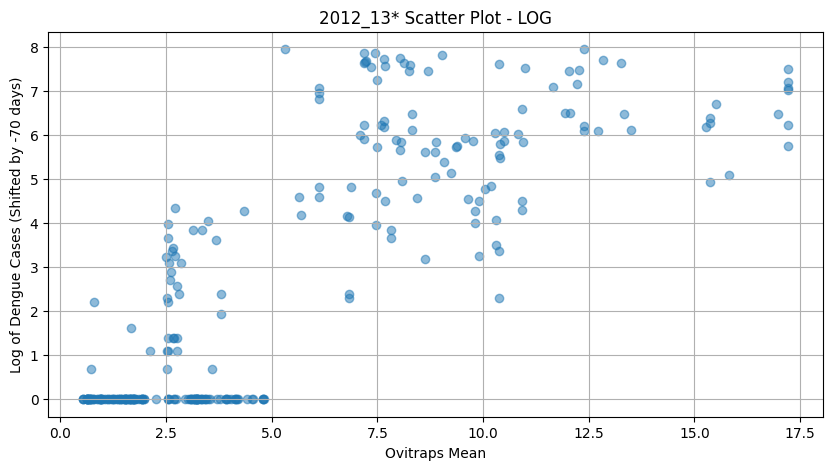

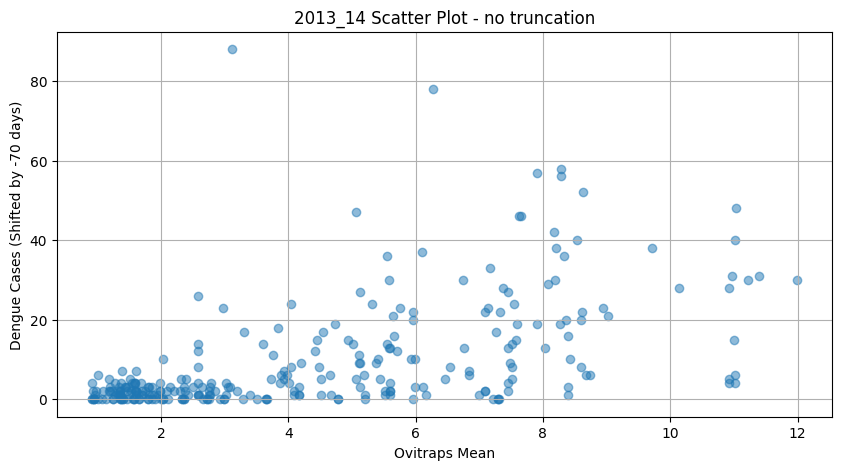

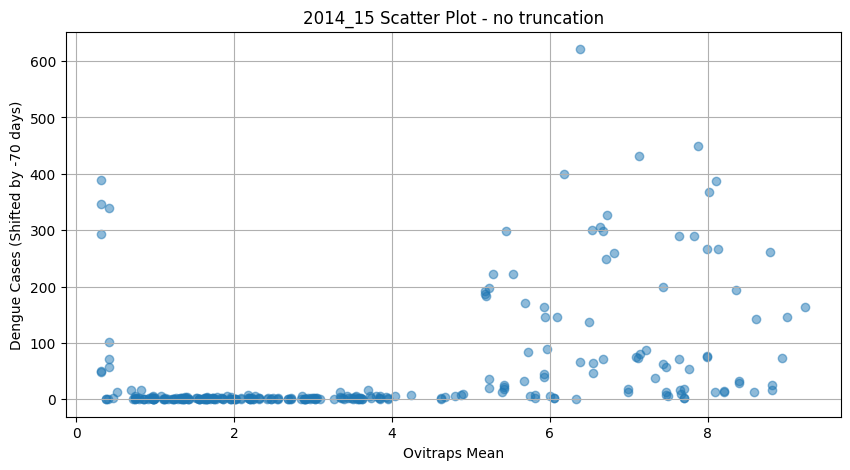

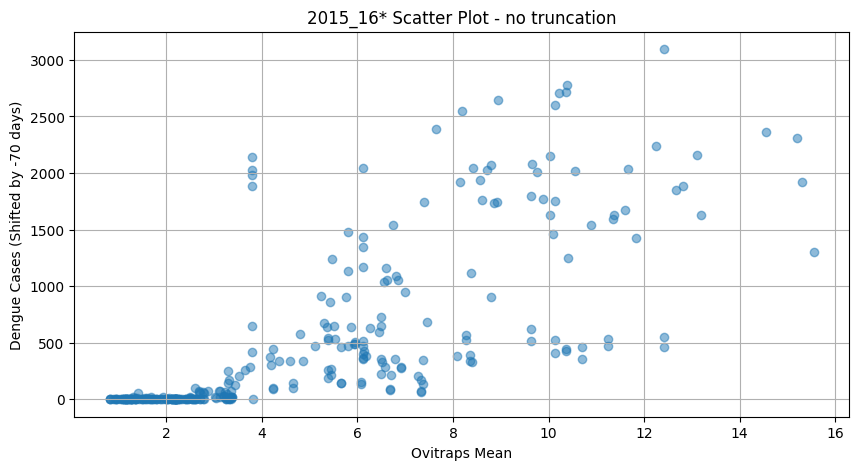

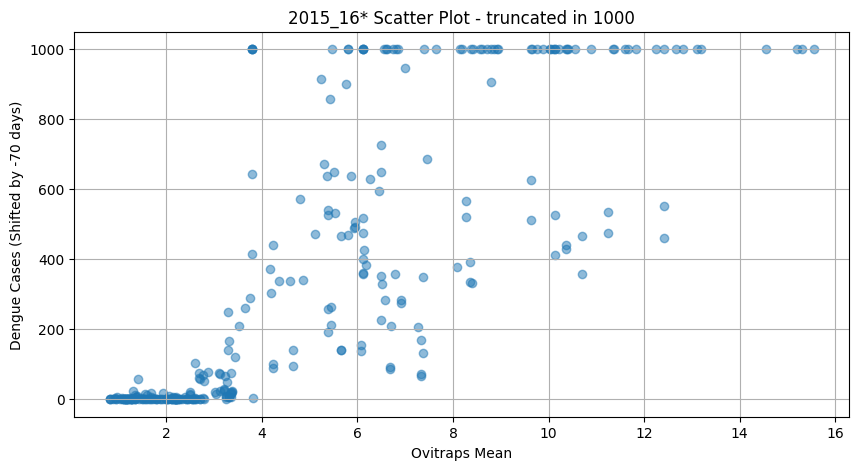

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


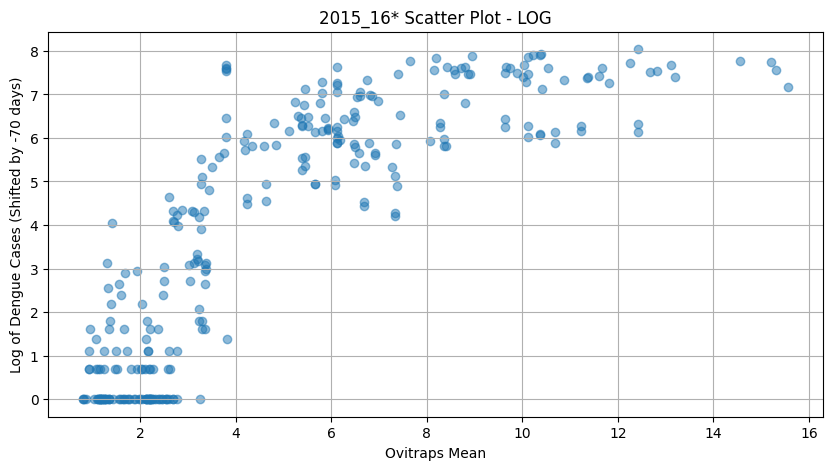

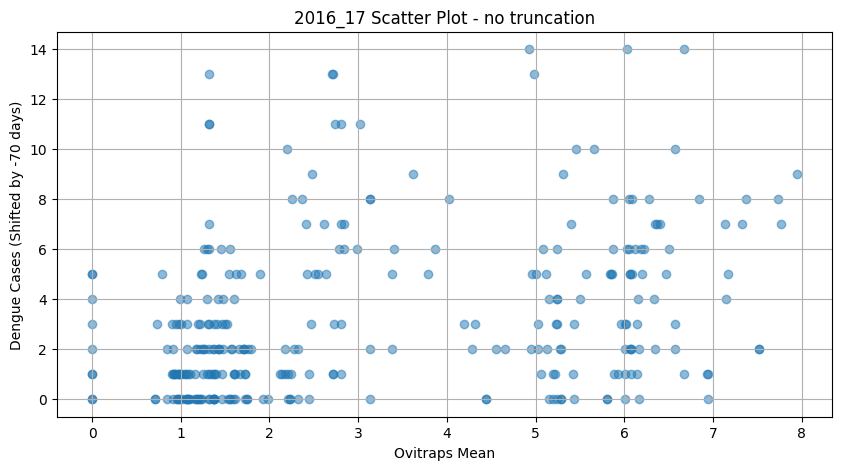

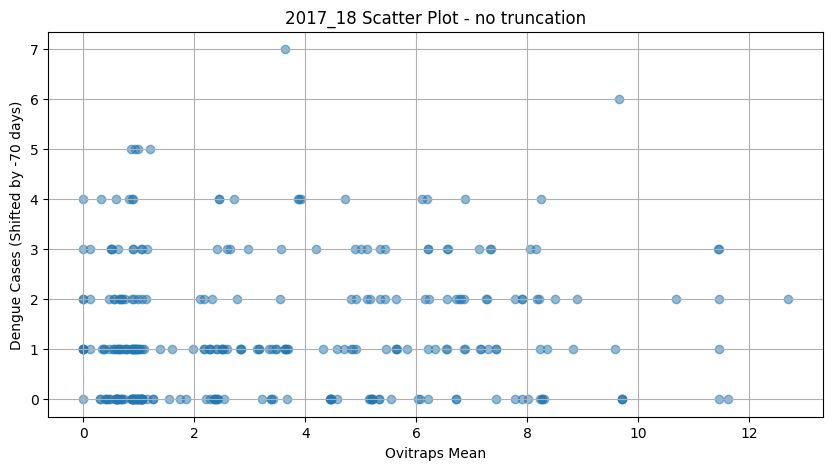

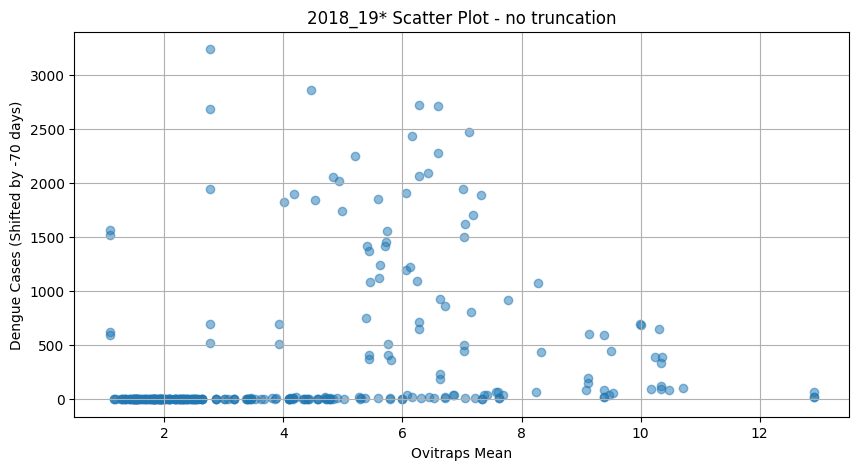

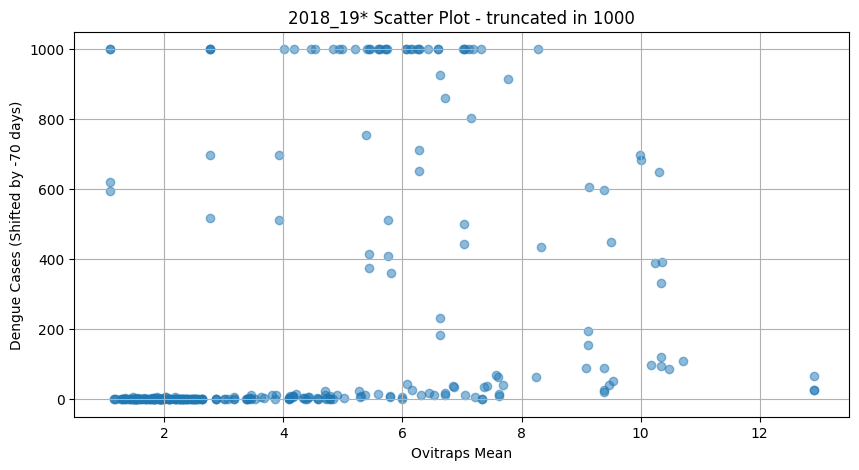

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


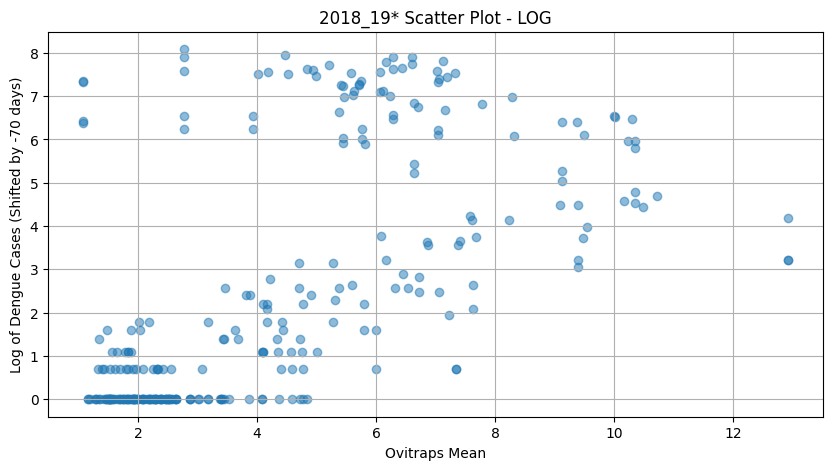

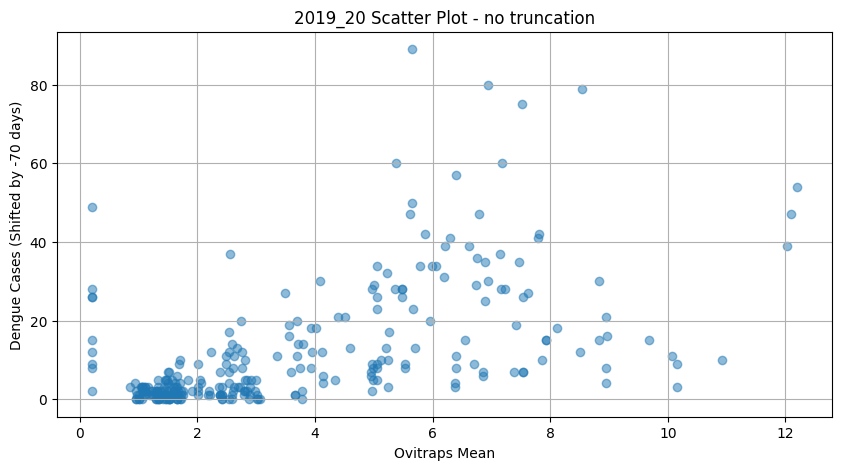

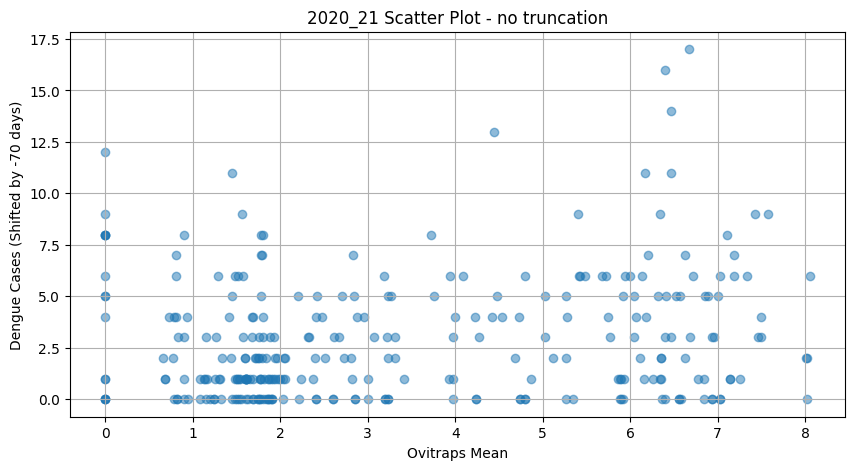

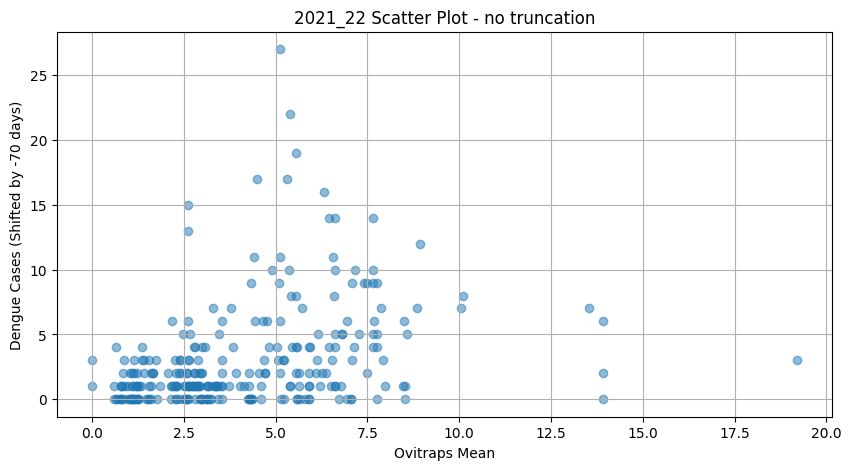

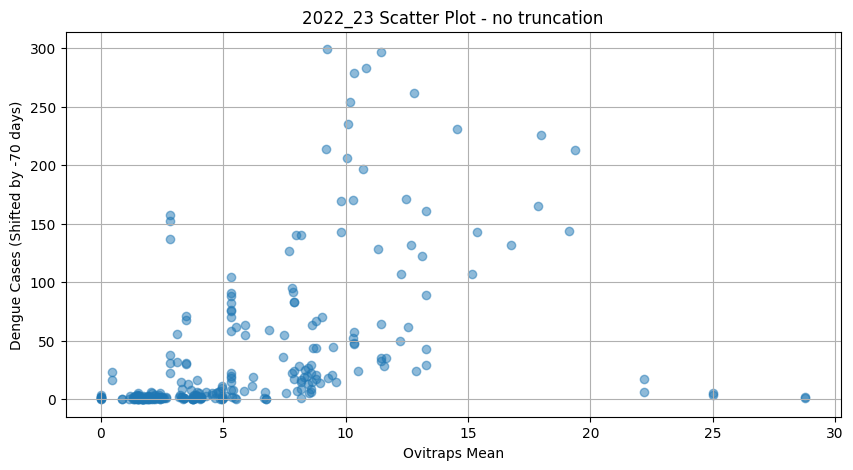

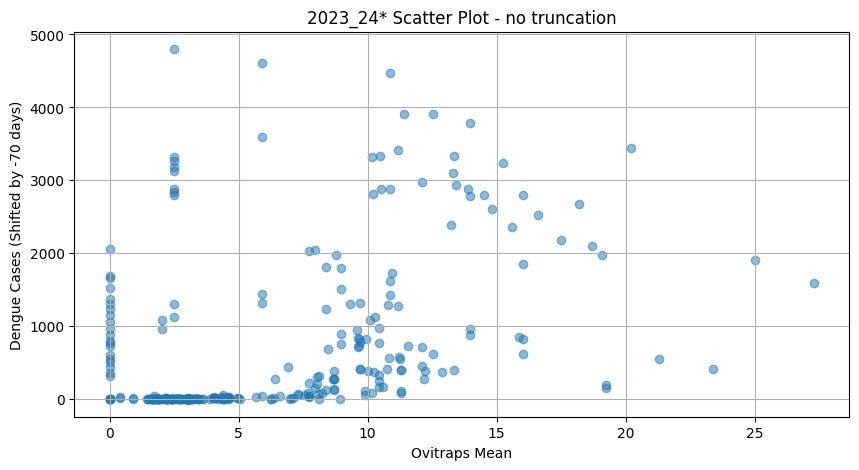

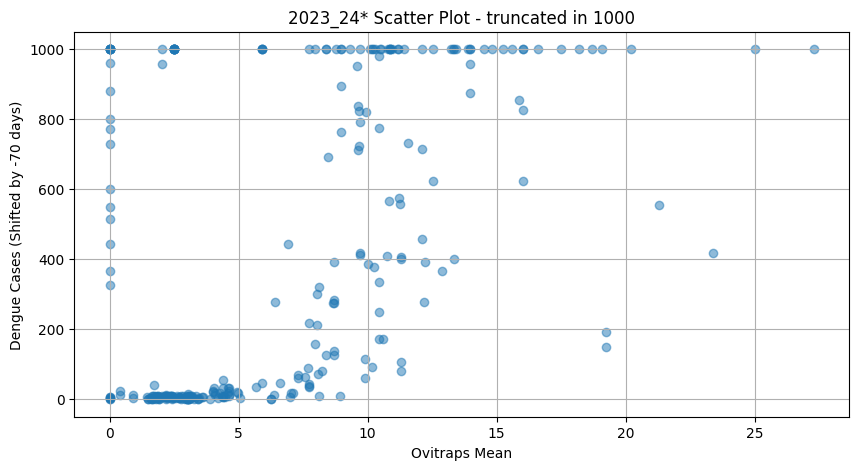

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


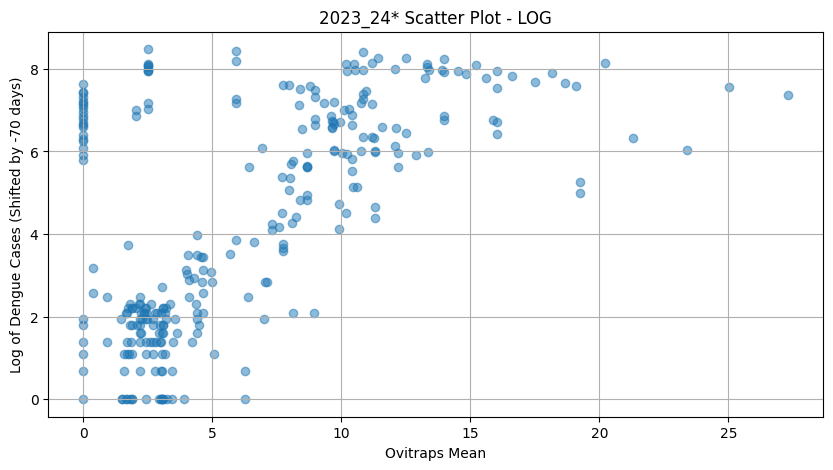

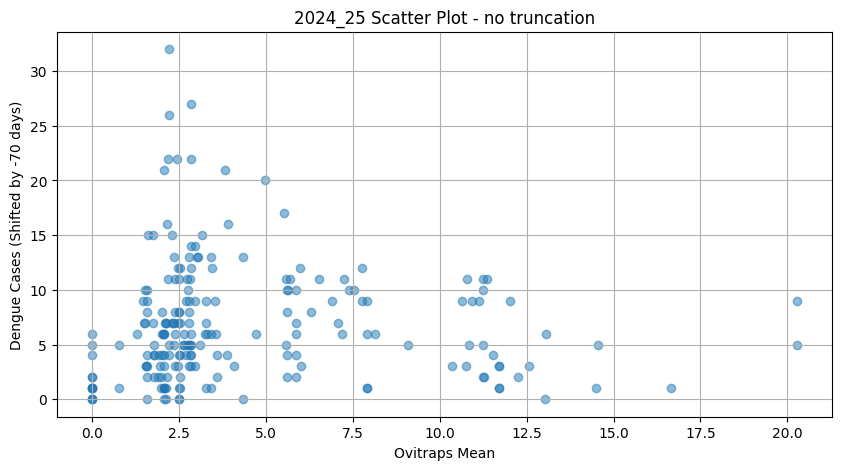

In [ ]:
all_years = dengue_data.anoepid.unique()
all_years.sort()
max_correlation_dict = {}
for year in all_years:
    year_data = daily_dengue_data[
        daily_dengue_data_with_anoepid["anoepid"] == year
    ]
    try:
        if year in project_utils.EPIDEMY_YEARS:
            marker = "*"
        else:
            marker = ""
        # Plot cross-correlation for each year
        generic.two_series_scatter_plot(
            daily_ovitraps_mean,
            year_data,
            series_2_shift=shift,
            title=f"{year}{marker} Scatter Plot - no truncation",
            xlabel="Ovitraps Mean",
            ylabel=f"Dengue Cases (Shifted by {shift} days)",
        )
        if year in project_utils.EPIDEMY_YEARS:
            generic.two_series_scatter_plot(
                daily_ovitraps_mean,
                year_data.clip(upper=1000),
                series_2_shift=shift,
                title=f"{year}{marker} Scatter Plot - truncated in 1000",
                xlabel="Ovitraps Mean",
                ylabel=f"Dengue Cases (Shifted by {shift} days)",
            )

            generic.two_series_scatter_plot(
                daily_ovitraps_mean,
                np.log(year_data).replace(-np.inf, 0),
                series_2_shift=shift,
                title=f"{year}{marker} Scatter Plot - LOG",
                xlabel="Ovitraps Mean",
                ylabel=f"Log of Dengue Cases (Shifted by {shift} days)",
            )
    except ValueError as e:
        print(f"Skipping year {year} due to error: {e}")
        continue

# Box-plot

In [ ]:
daily_ovitraps_mean_shifted = daily_ovitraps_mean.shift(48)


## All years

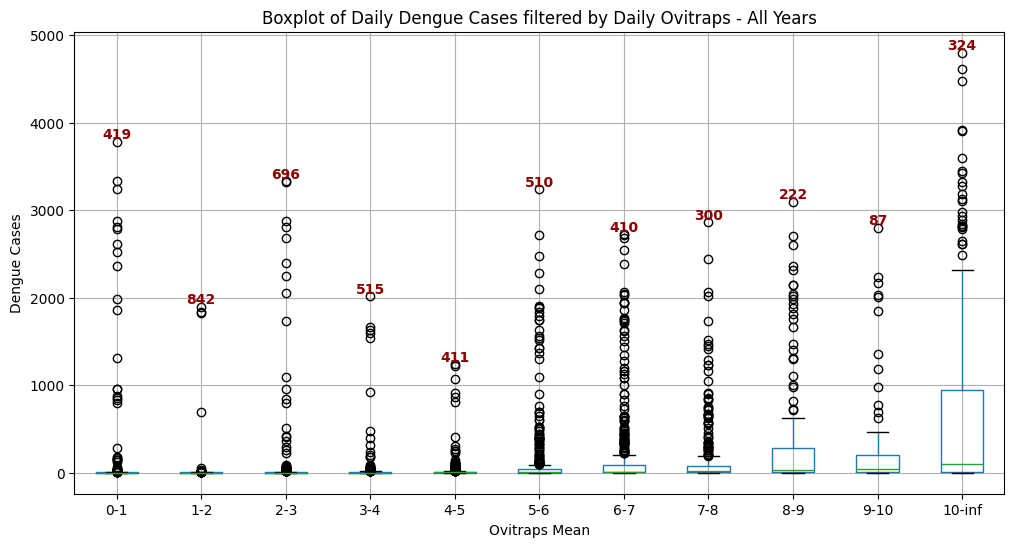

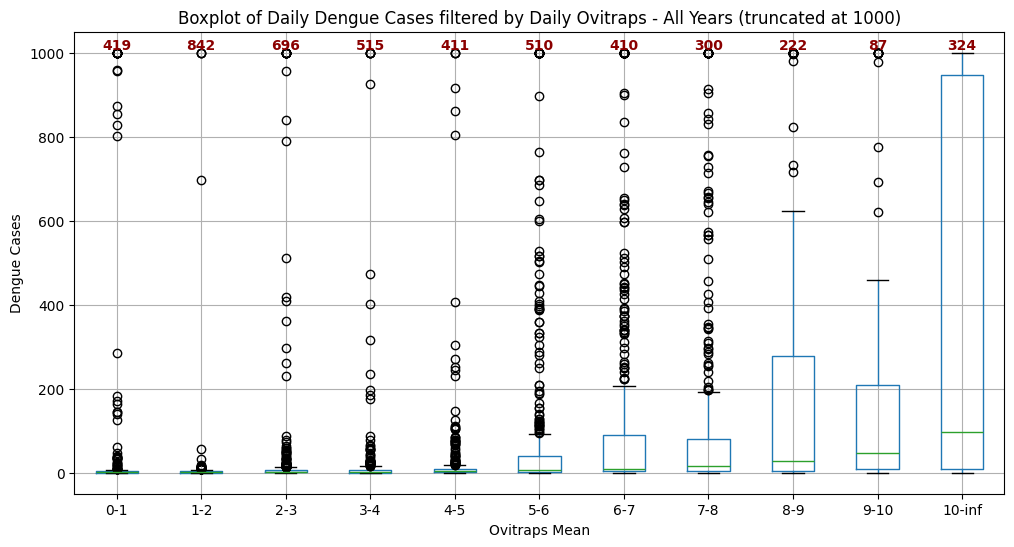

In [ ]:
project_utils.boxplot_filtered_data(
    daily_dengue_data,
    daily_ovitraps_mean_shifted,
    title="Boxplot of Daily Dengue Cases filtered by Daily Ovitraps - All Years",
    lower_limit=range(0, 11),
    upper_limit=range(1, 12),
    truncation_limit=1000,
)


## Epidemy Years

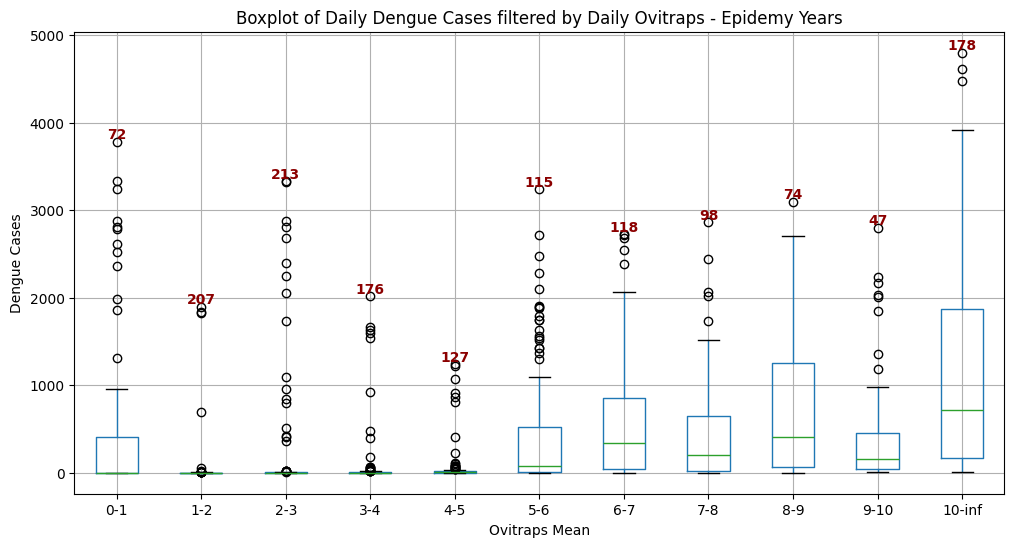

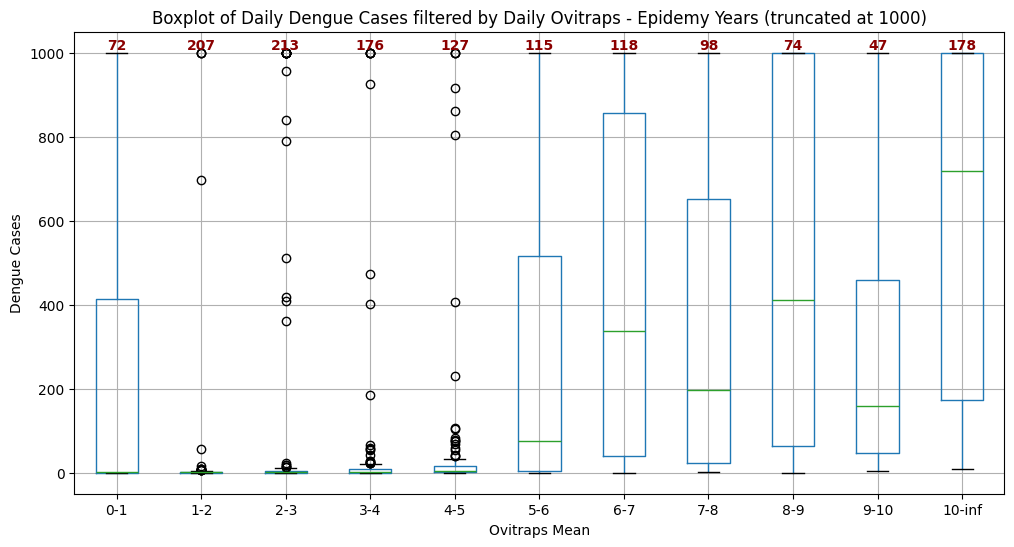

In [ ]:
project_utils.boxplot_filtered_data(
    daily_dengue_data_epidemic,
    daily_ovitraps_mean_shifted,
    title="Boxplot of Daily Dengue Cases filtered by Daily Ovitraps - Epidemy Years",
    lower_limit=range(0, 11),
    upper_limit=range(1, 12),
    truncation_limit=1000,
)


## Non-Epidemy Years

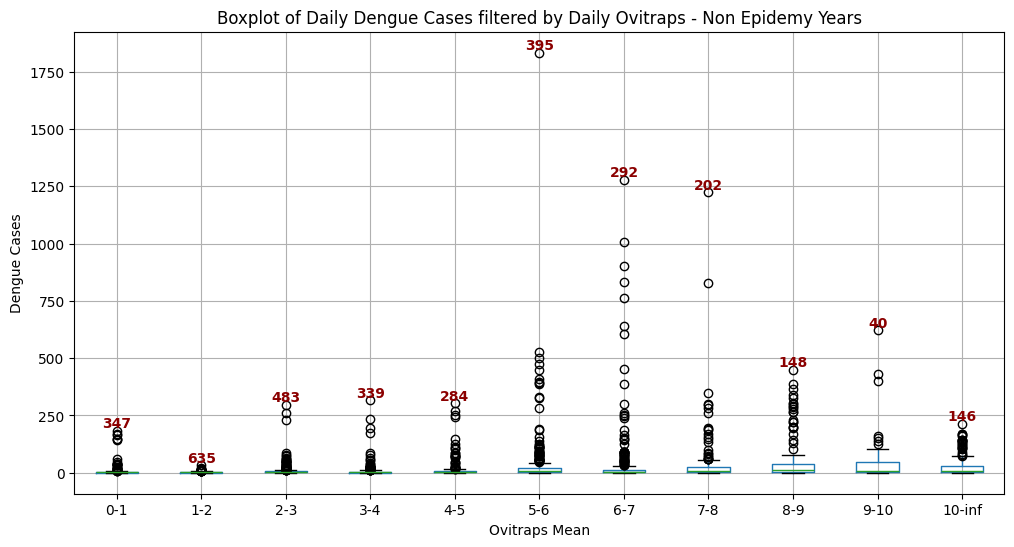

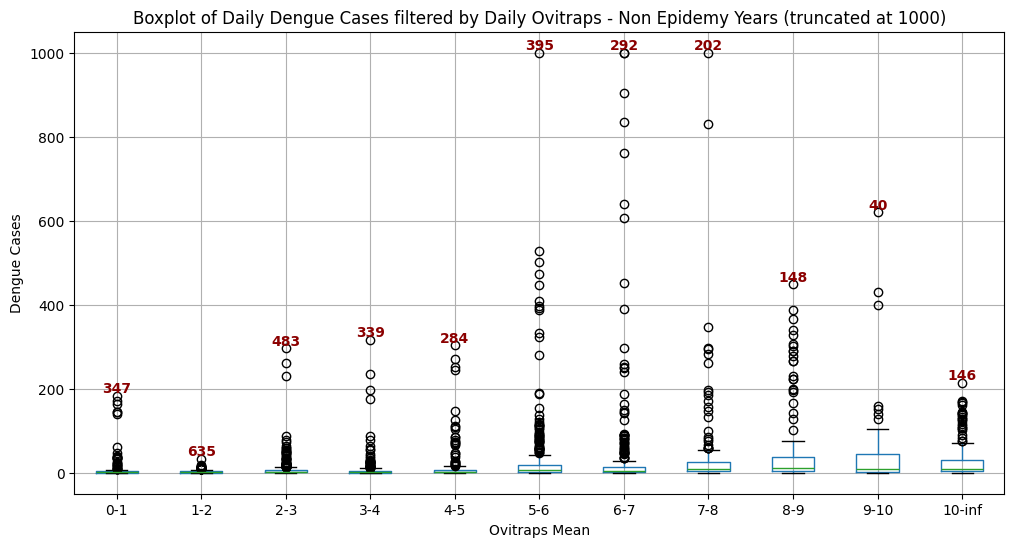

In [ ]:
project_utils.boxplot_filtered_data(
    daily_dengue_data_non_epidemic,
    daily_ovitraps_mean_shifted,
    title="Boxplot of Daily Dengue Cases filtered by Daily Ovitraps - Non Epidemy Years",
    lower_limit=range(0, 11),
    upper_limit=range(1, 12),
    truncation_limit=1000,
)


## Year by year

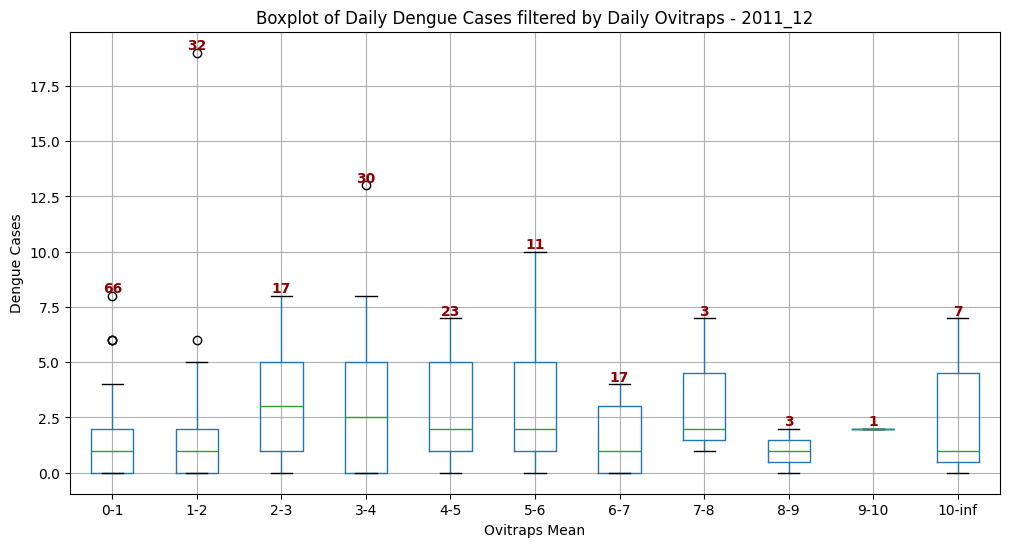

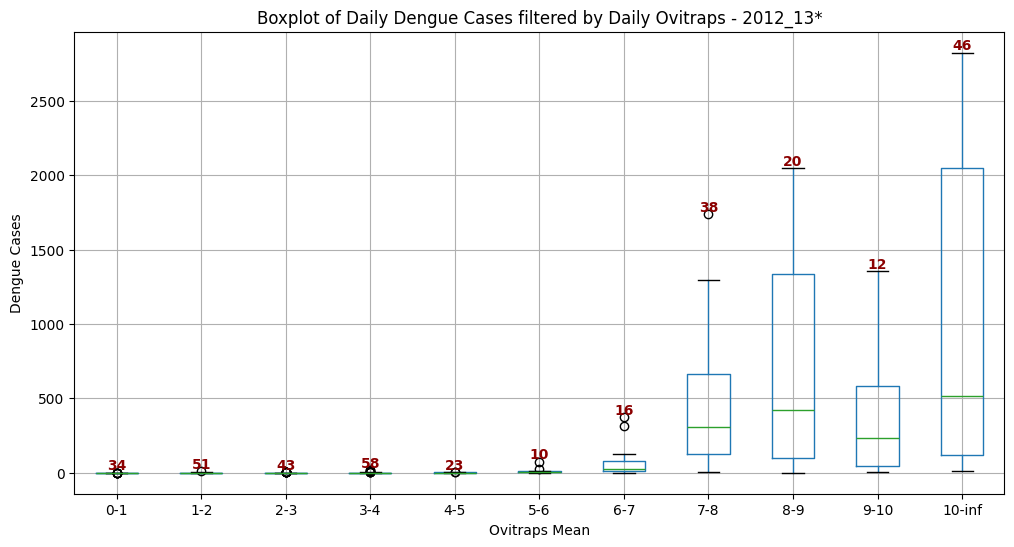

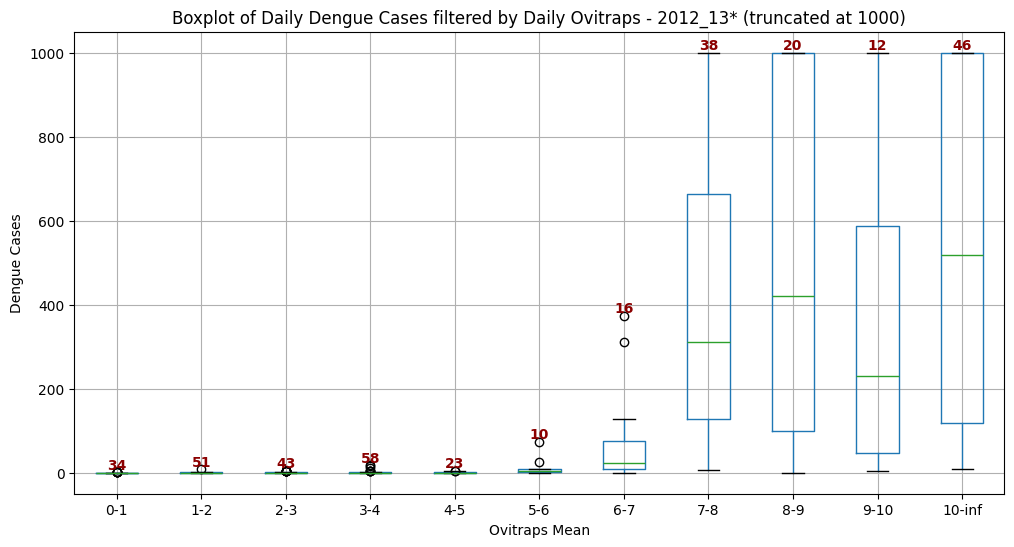

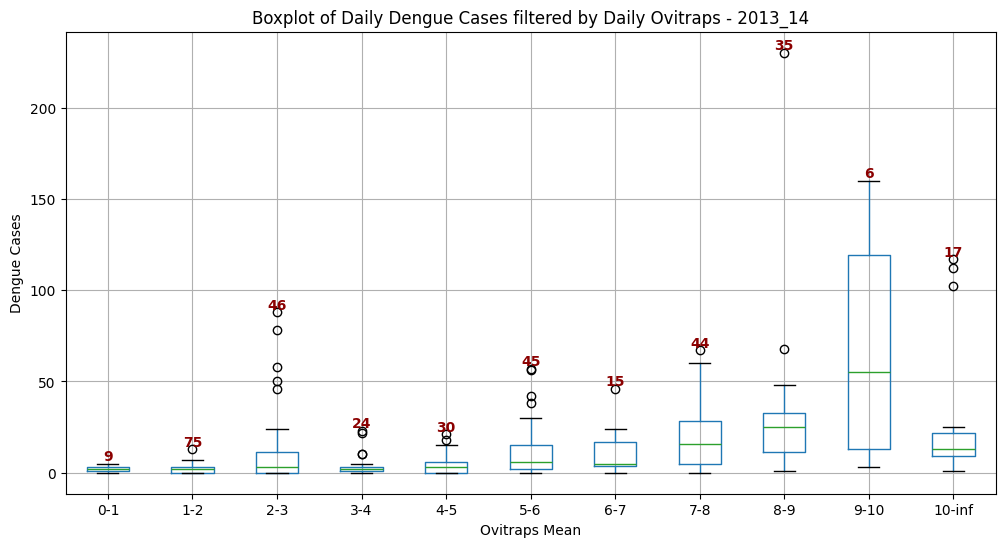

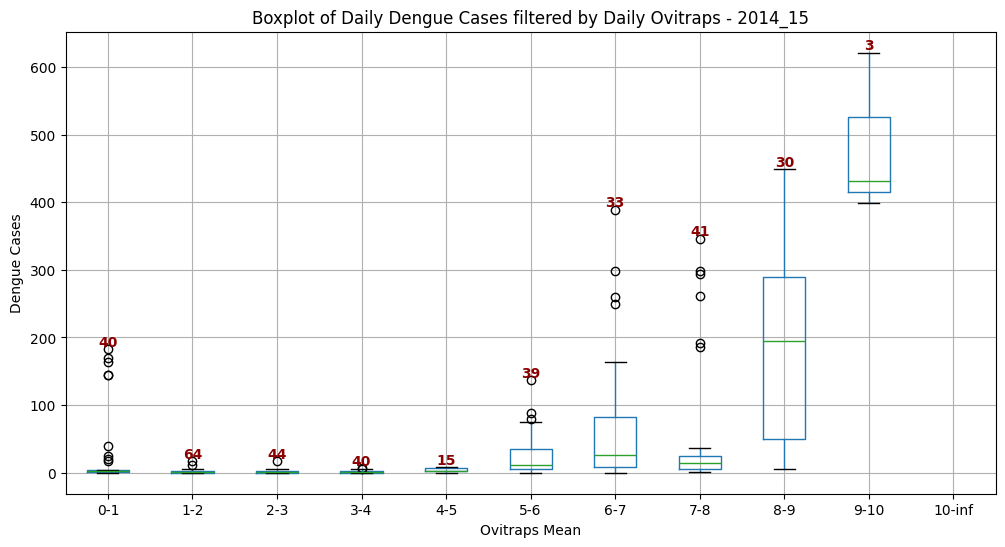

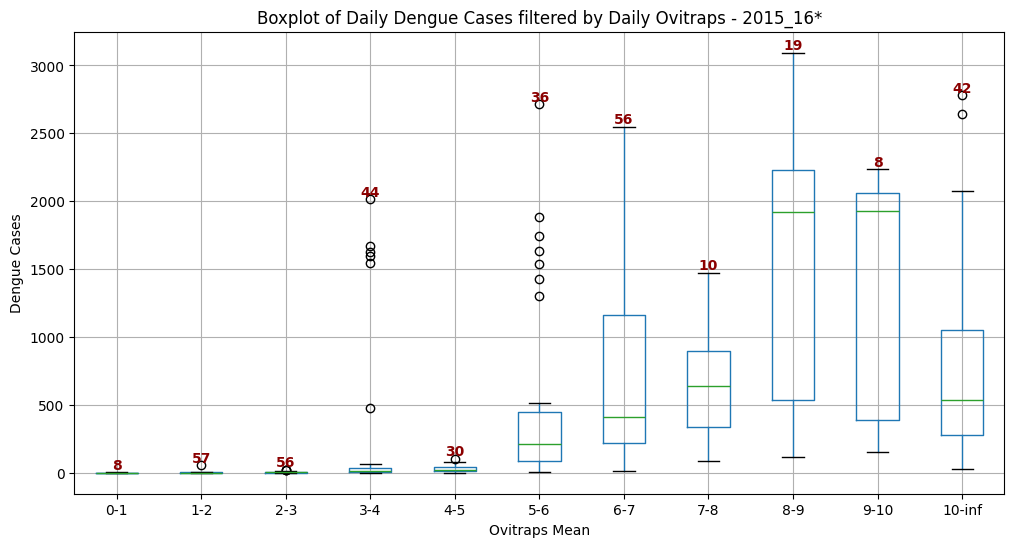

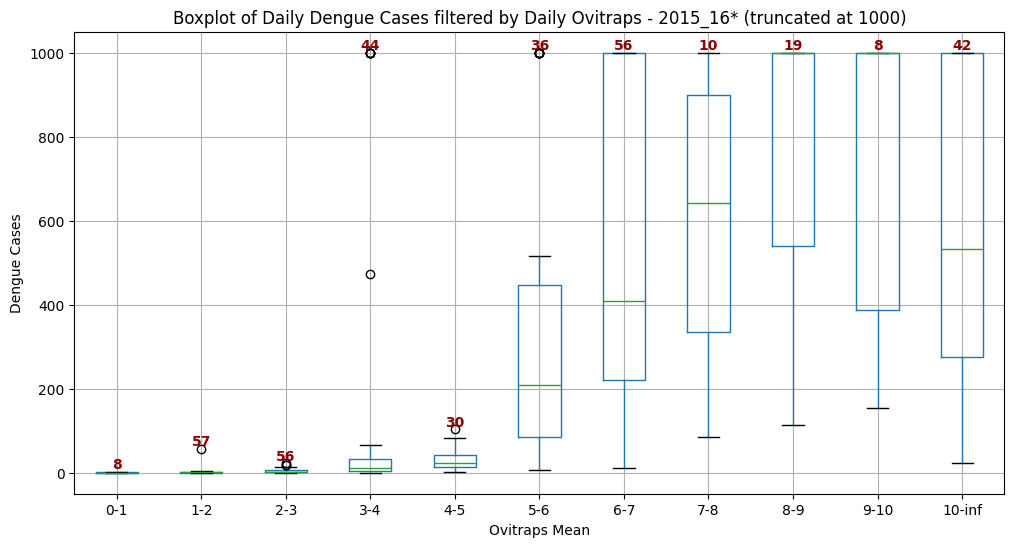

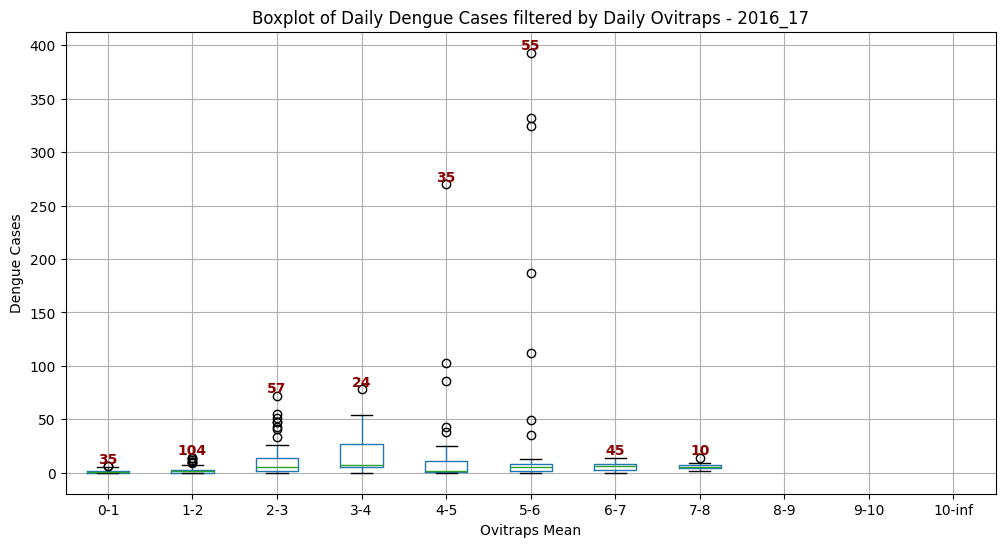

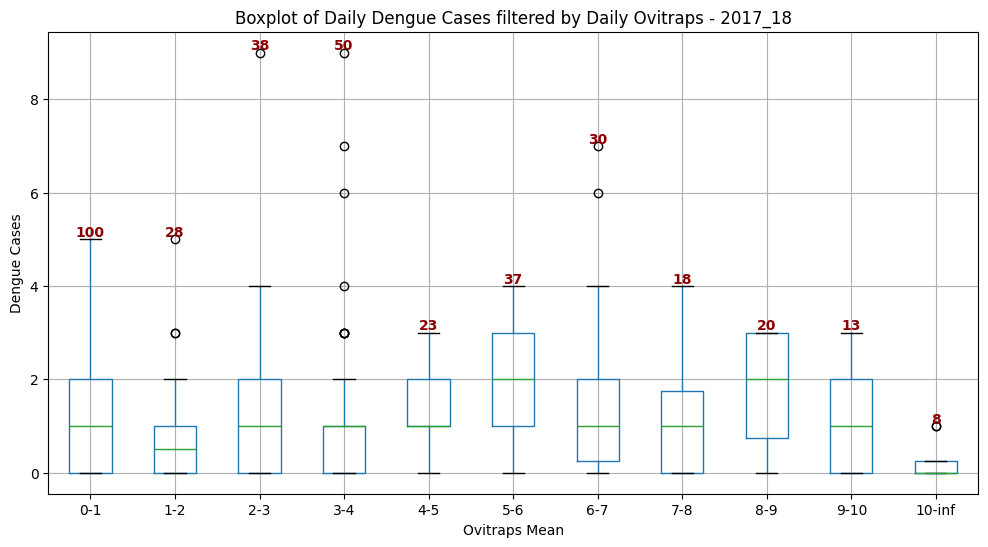

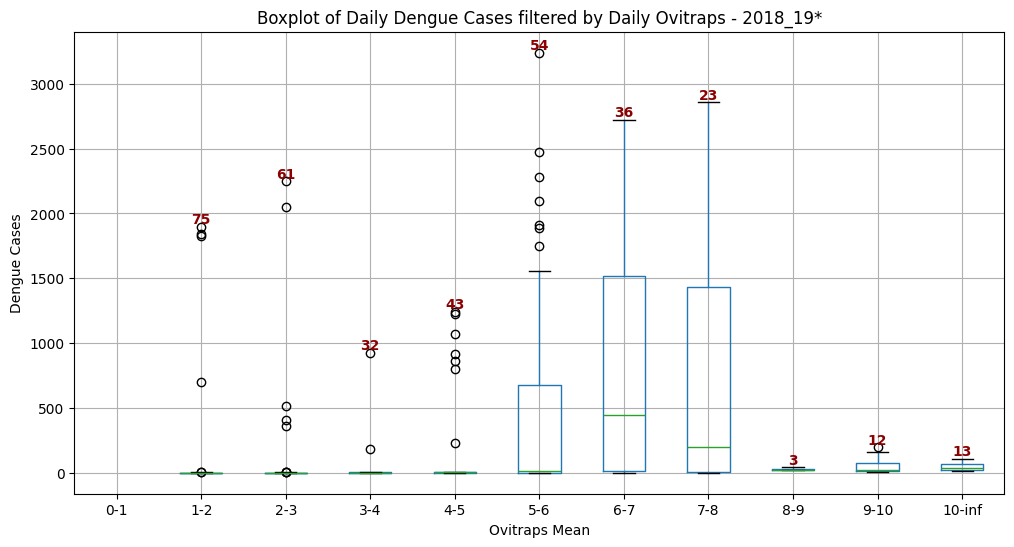

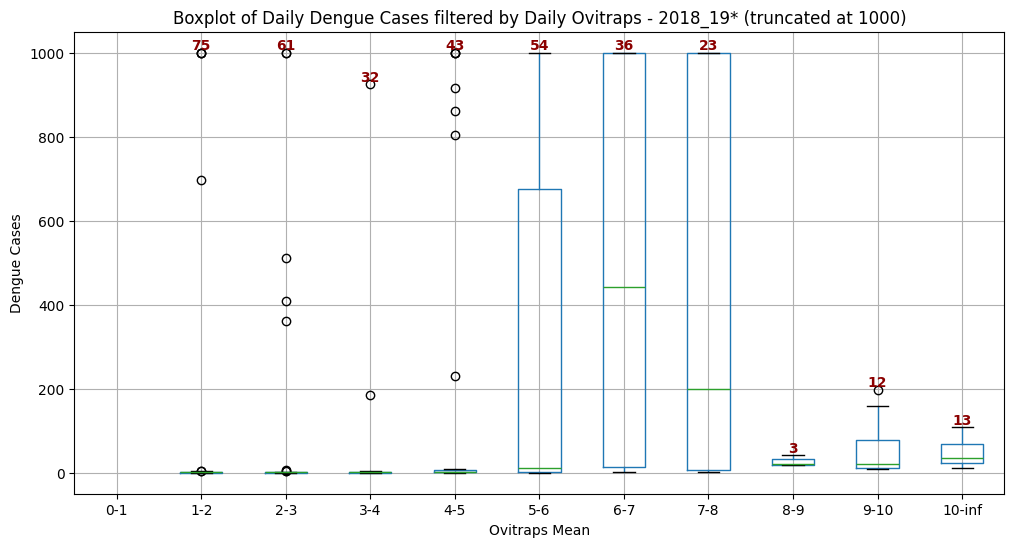

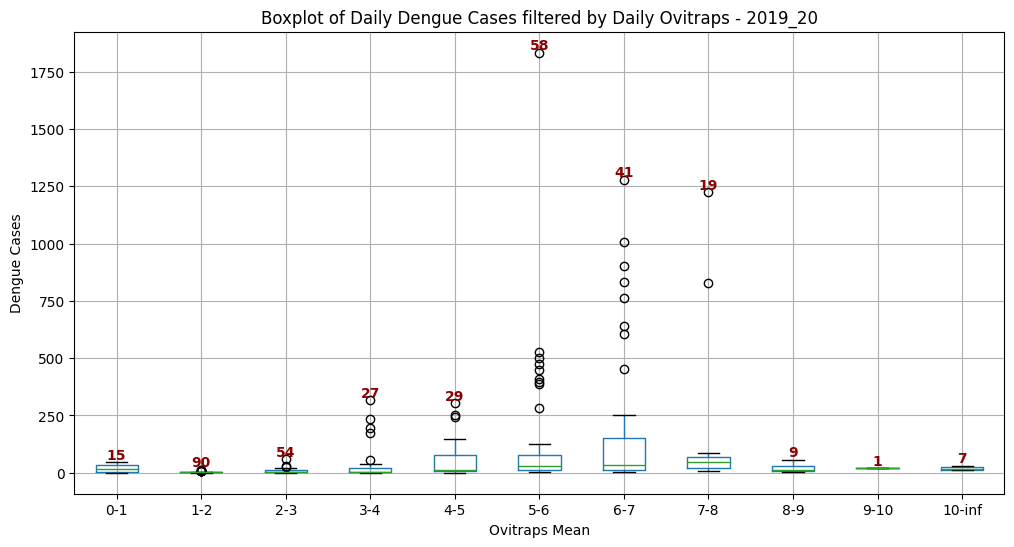

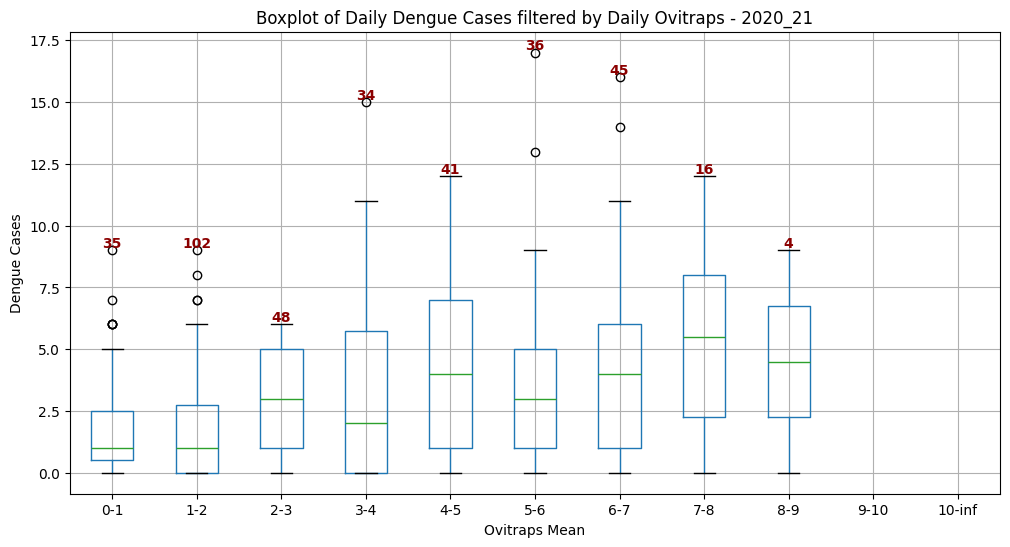

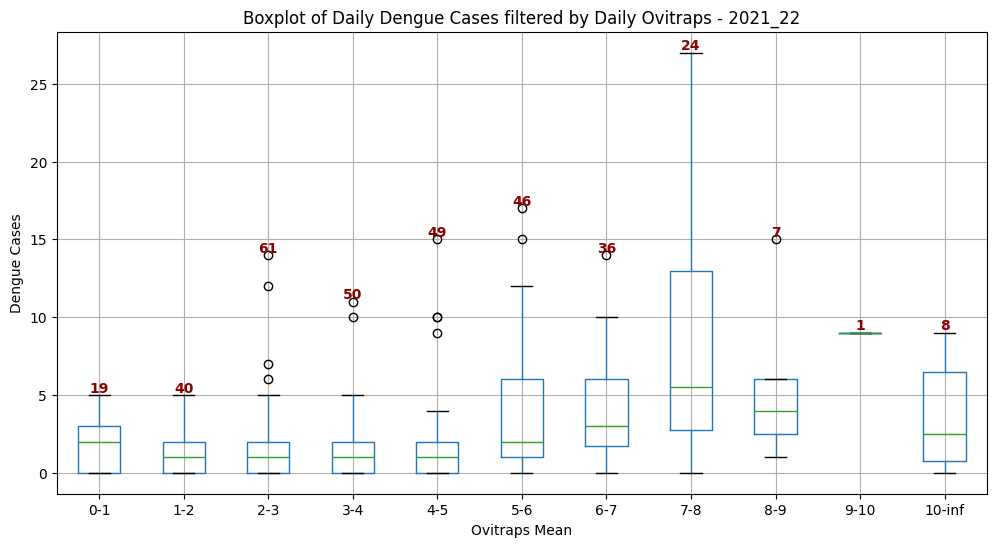

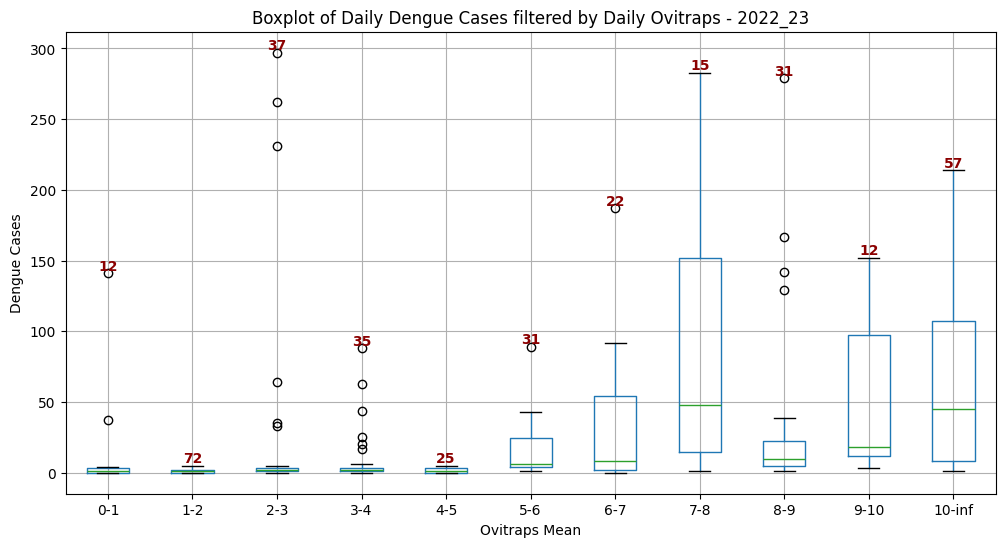

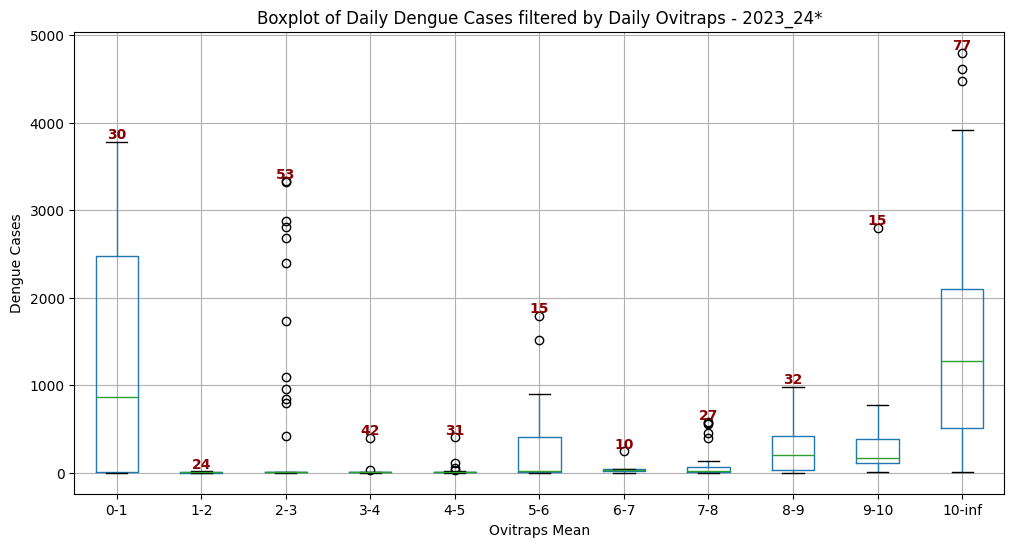

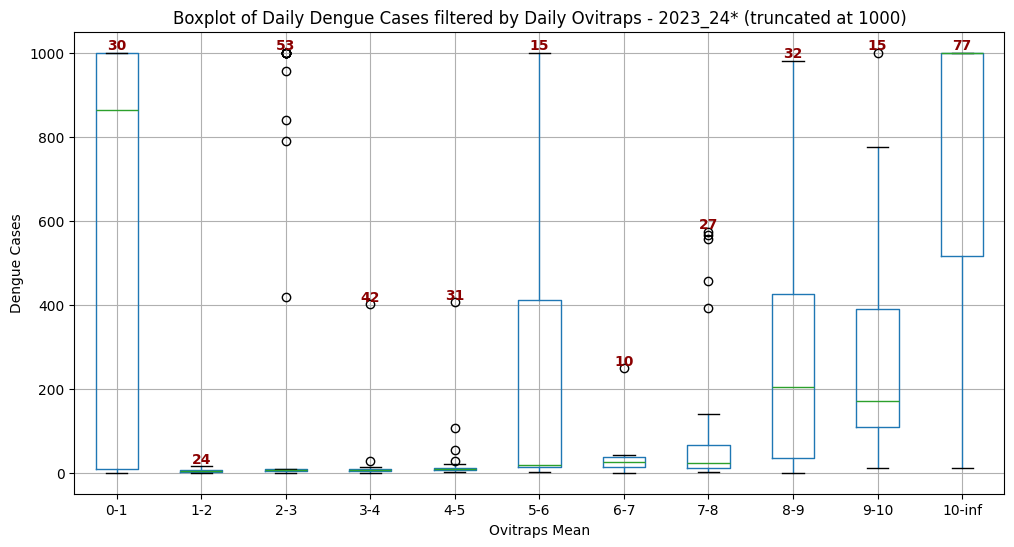

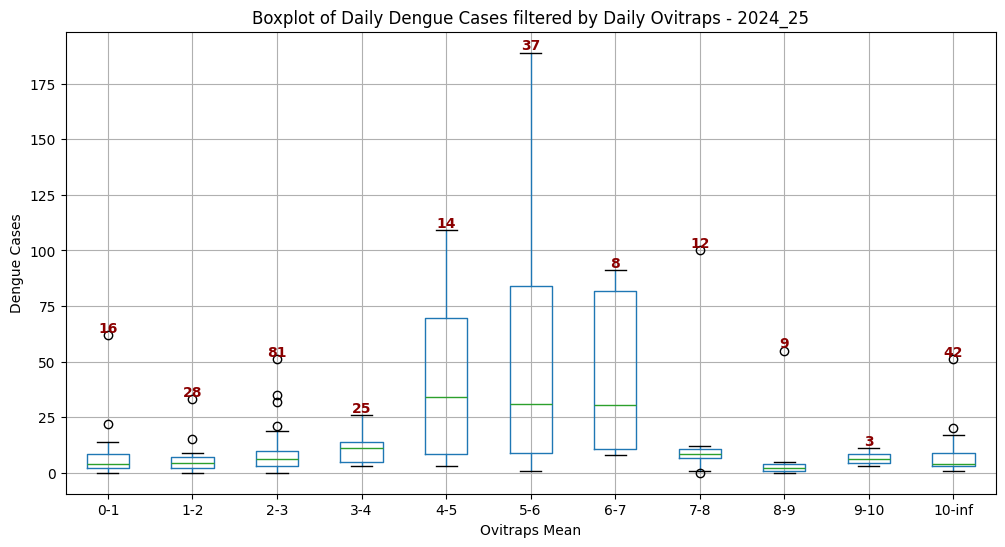

In [ ]:
daily_dengue_years = dengue_data.anoepid.unique()
ovitraps_years = ovitraps_data.anoepid.unique()
all_years = list(set(daily_dengue_years).intersection(set(ovitraps_years)))
all_years.sort()
max_correlation_dict = {}
for year in all_years:
    year_data = daily_dengue_data[
        daily_dengue_data_with_anoepid["anoepid"] == year
    ]
    try:
        if year in project_utils.EPIDEMY_YEARS:
            marker = "*"
            truncate = True
        else:
            marker = ""
            truncate = False

        # Boxplot for each year
        project_utils.boxplot_filtered_data(
            year_data,
            daily_ovitraps_mean_shifted,
            title=f"Boxplot of Daily Dengue Cases filtered by Daily Ovitraps - {year}{marker}",
            lower_limit=range(0, 11),
            upper_limit=range(1, 12),
            truncate_plot=truncate,
        )

    except ValueError as e:
        print(f"Skipping year {year} due to error: {e}")
        continue
